In [23]:
import ndlib
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
import matplotlib.pyplot as plt
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
from ndlib.viz.mpl.TrendComparison import DiffusionTrendComparison
%matplotlib inline

In [3]:
# directed graph of our network

g = nx.read_edgelist("D:/Dati PRAW/vecchi/SNA 14th commit/Project_Social_Network_Analysis-main/dati_ripuliti_edgelist.csv", delimiter=",", nodetype=str, create_using=nx.DiGraph())

n_nodes = g.number_of_nodes()
n_edges = g.number_of_edges()

print(n_nodes, ",", n_edges)

24819 , 107094


In [4]:
# infection rates (b) and recovery rates (u)

# first model
b = 0.359
u = 0.333

# second model (three phases)
# first phase
b1 = 0.298
u1 = 0.293

# second phase
b2 = 0.478
u2 = 0.444

# third phase
b3 = 0.043
u3 = 0.048

#print(b1,b2,b3,u1,u2,u3)

# First model (poor fit for the data)

In [145]:
first_model = ep.SISModel(g)
first_model.available_statuses

{'Susceptible': 0, 'Infected': 1}

In [146]:
cfg = mc.Configuration()
cfg.add_model_parameter('beta', b) # infection rate
cfg.add_model_parameter('lambda', u) # recovery rate
#cfg.add_model_parameter("percentage_infected", 0.0001)
infected_nodes = ['wallstreetbets']
cfg.add_model_initial_configuration("Infected", infected_nodes)
first_model.set_initial_status(cfg)

In [147]:
iterations = first_model.iteration_bunch(25, node_status=True)
trends1 = first_model.build_trends(iterations)

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:05<00:00,  4.84it/s]


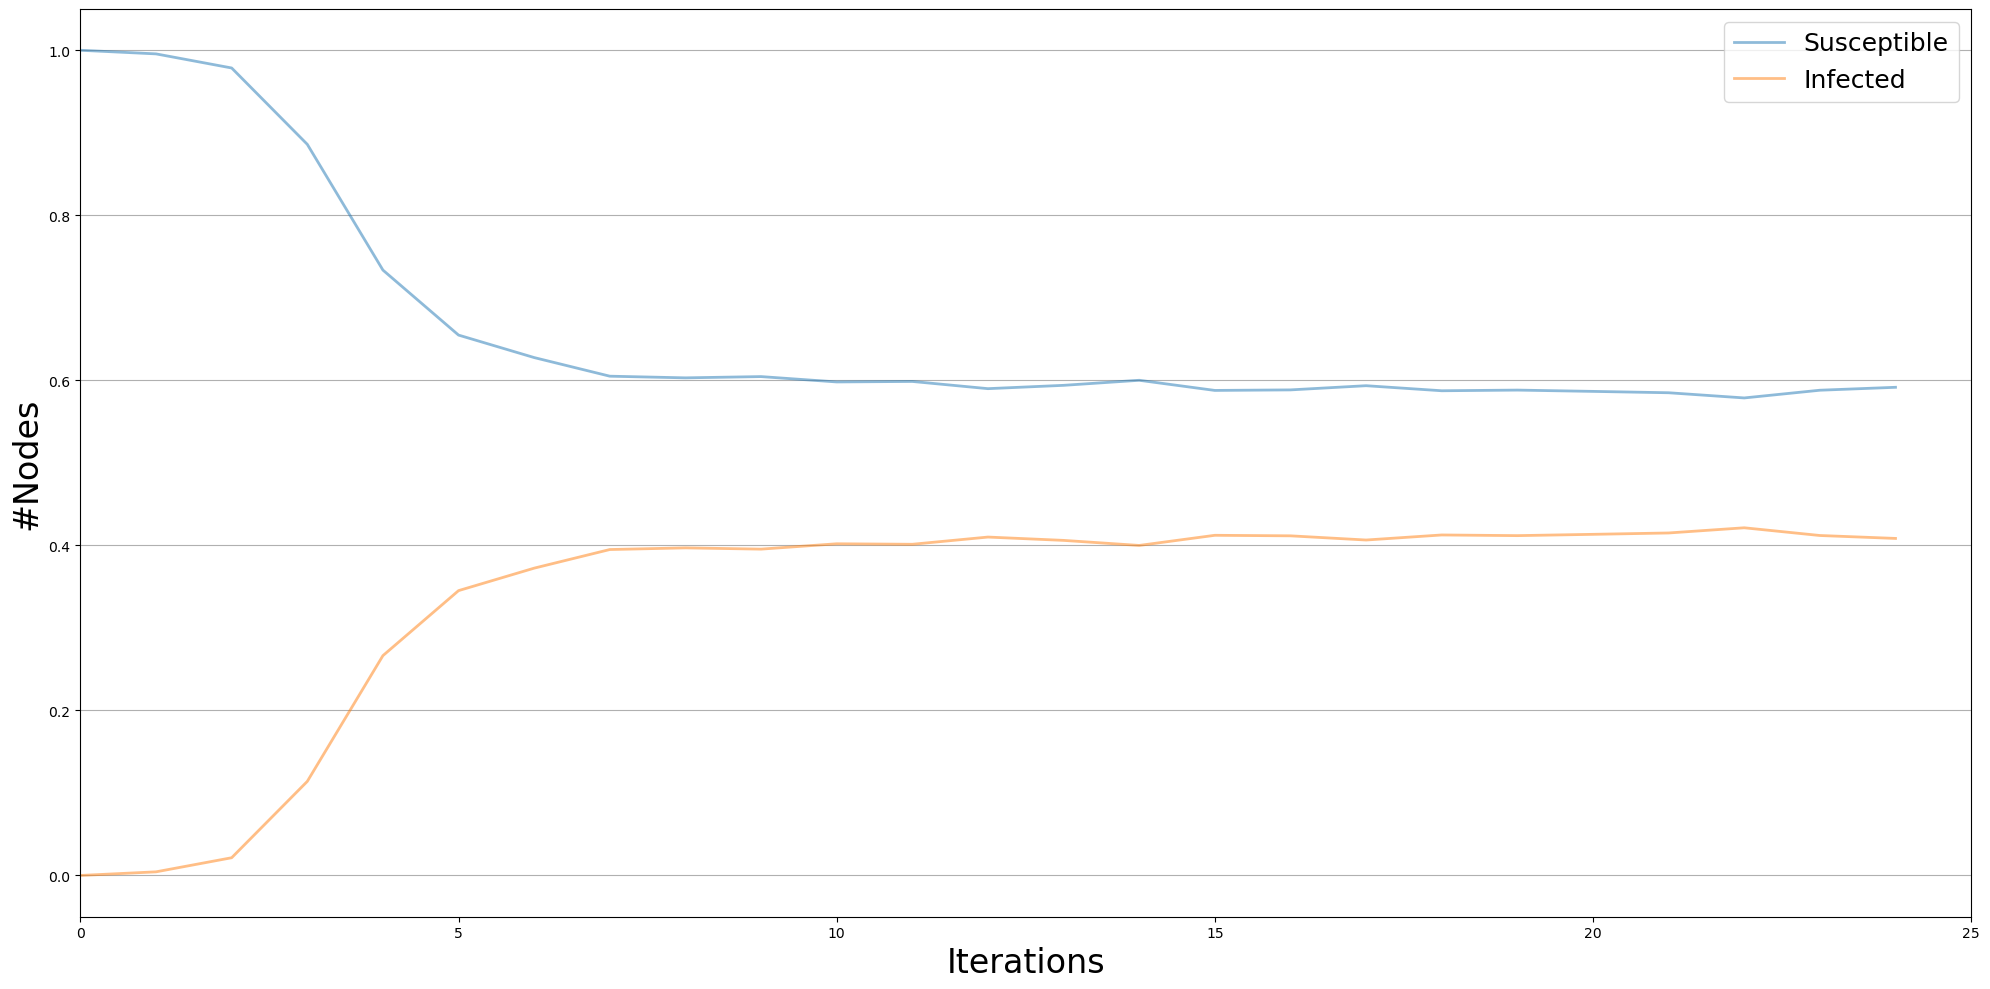

In [148]:
viz = DiffusionTrend(first_model, trends1)
viz.plot()

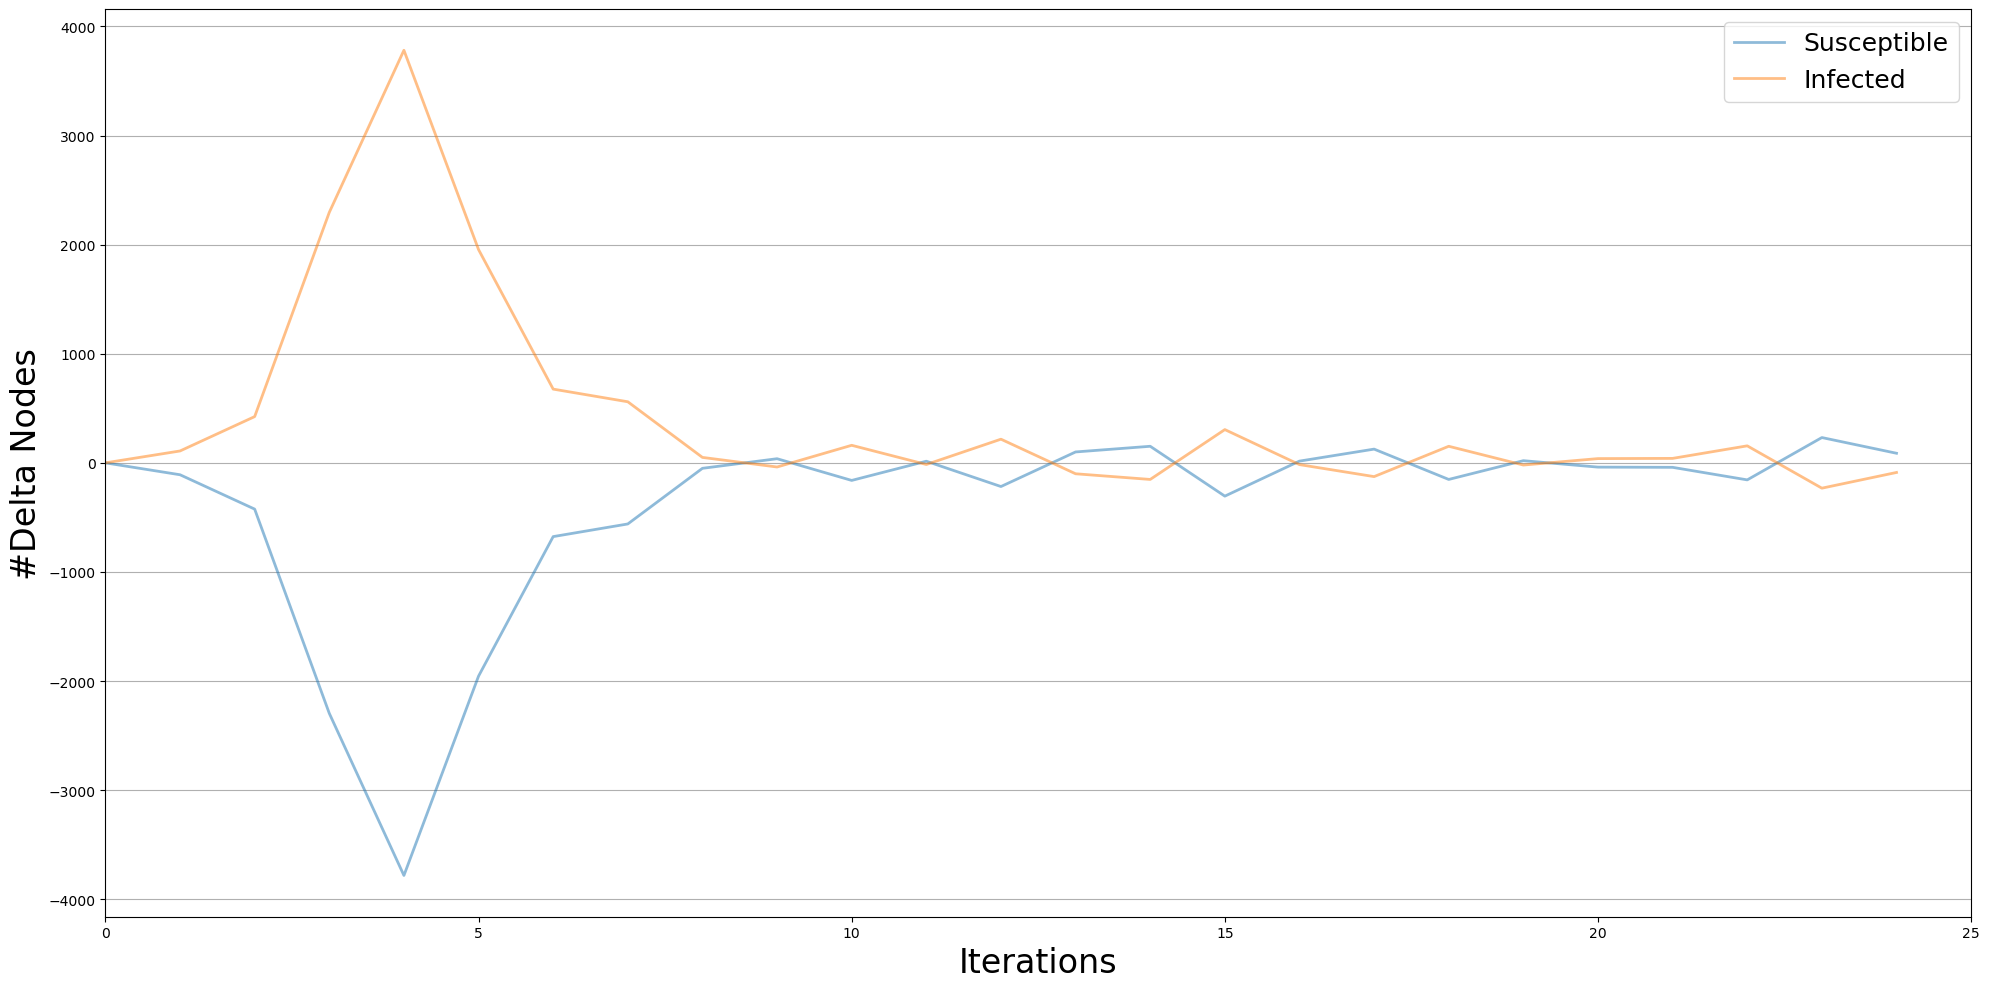

In [149]:
viz = DiffusionPrevalence(first_model, trends1)
viz.plot()

# Second model (three phases)

## 1st phase

In [47]:
model2_1 = ep.SISModel(g)
model2_1.available_statuses

{'Susceptible': 0, 'Infected': 1}

In [48]:
cfg = mc.Configuration()
cfg.add_model_parameter('beta', b1) # infection rate
cfg.add_model_parameter('lambda', u1) # recovery rate
#cfg.add_model_parameter("percentage_infected", 0.0001)
infected_nodes = ['wallstreetbets']
cfg.add_model_initial_configuration("Infected", infected_nodes)
model2_1.set_initial_status(cfg)

In [49]:
iterations = model2_1.iteration_bunch(20, node_status=True)
trends2_1 = model2_1.build_trends(iterations)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.81it/s]


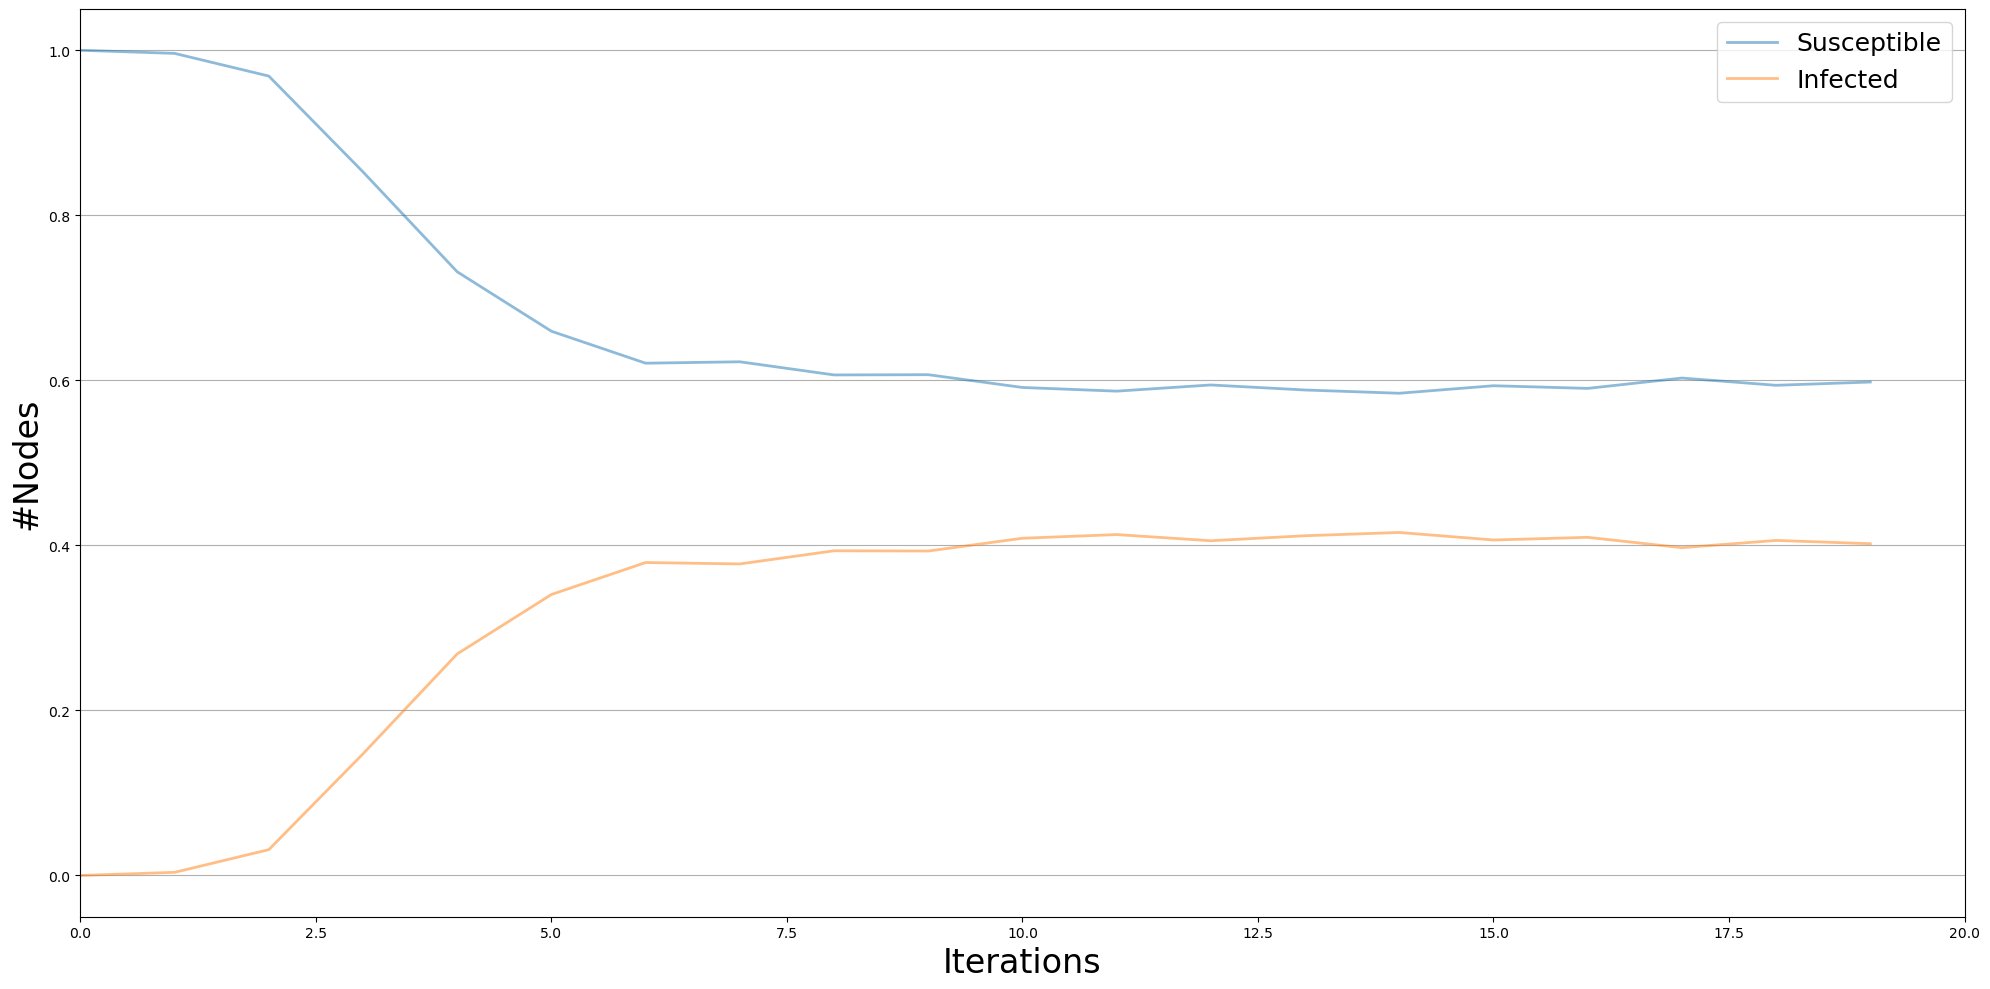

In [50]:
viz = DiffusionTrend(model2_1, trends2_1)
viz.plot()

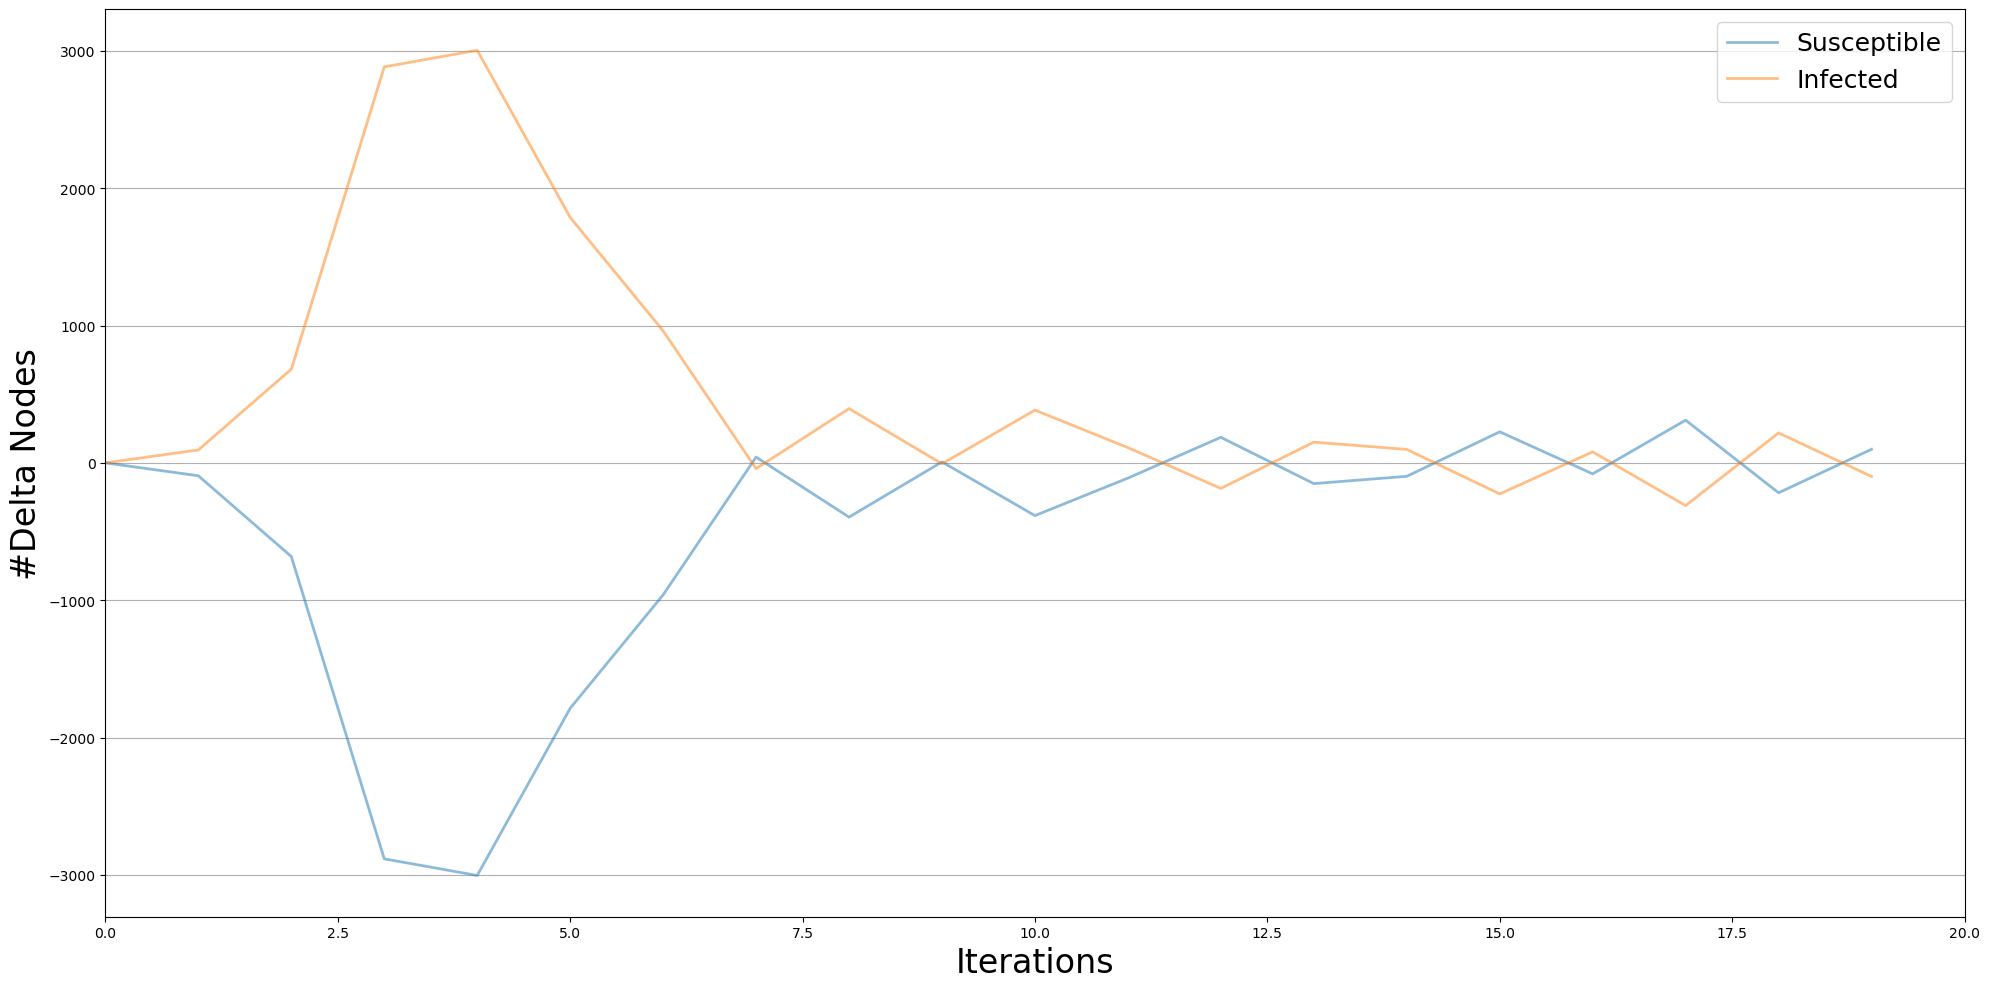

In [51]:
viz = DiffusionPrevalence(model2_1, trends2_1)
viz.plot()

In [52]:
# estracted the status of all the nodes from the dictionary containing all the status changes
# in order to run a test with them for the second phase

infected_1 = []
not_infected_1 = []

for key, item in list(iterations[0]['status'].items()):
    i = 19
    while (key not in iterations[i]['status'].keys()):
        i=i-1
    if (iterations[i]['status'][key]==1):
        infected_1.append(key)
    else:
        not_infected_1.append(key)
        
print(len(infected_1), len(not_infected_1))

9978 14841


## 2nd phase (low % of infected at time 0)

In [110]:
model2_2 = ep.SISModel(g)
model2_2.available_statuses

{'Susceptible': 0, 'Infected': 1}

In [111]:
cfg = mc.Configuration()
cfg.add_model_parameter('beta', b2) # infection rate
cfg.add_model_parameter('lambda', u2) # recovery rate
cfg.add_model_parameter("percentage_infected", 0.01)
model2_2.set_initial_status(cfg)

In [112]:
iterations = model2_2.iteration_bunch(25, node_status=True)
trends2_2 = model2_2.build_trends(iterations)

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:05<00:00,  4.60it/s]


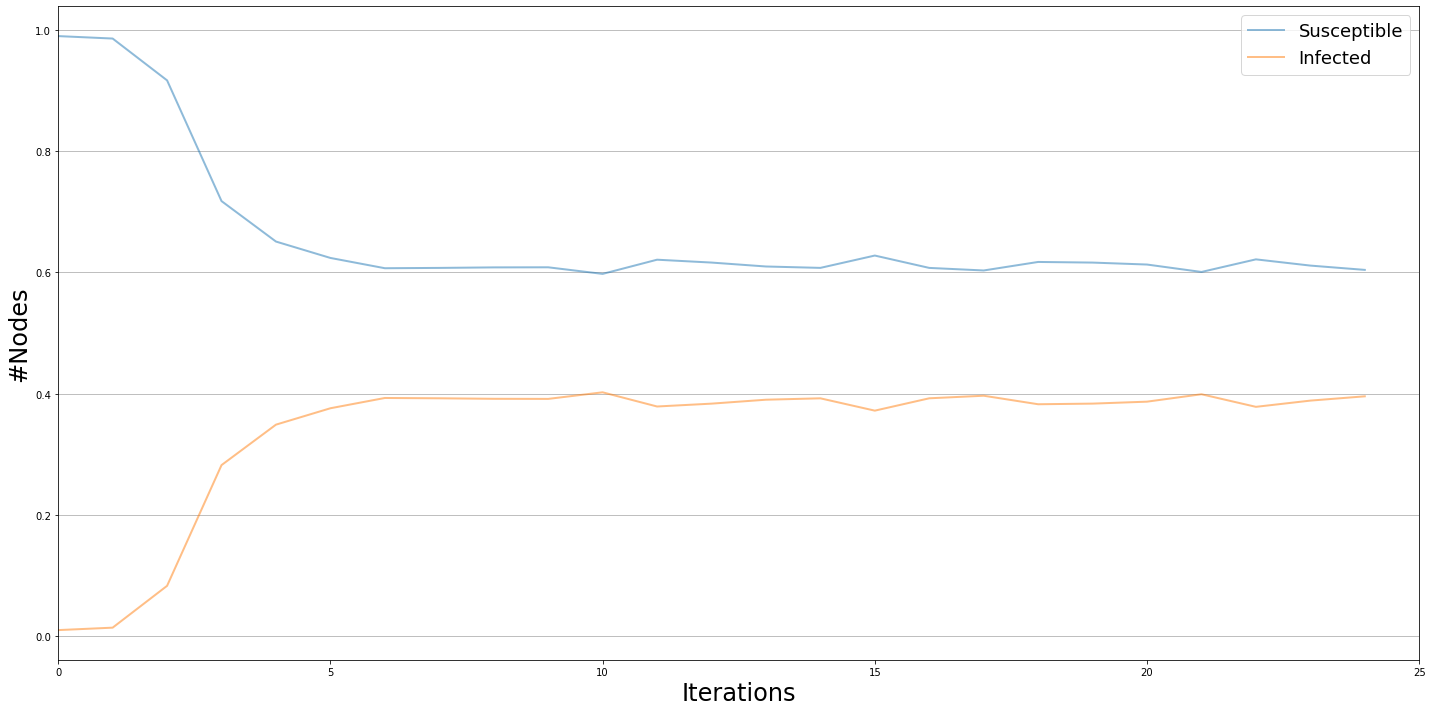

In [113]:
viz = DiffusionTrend(model2_2, trends2_2)
viz.plot()

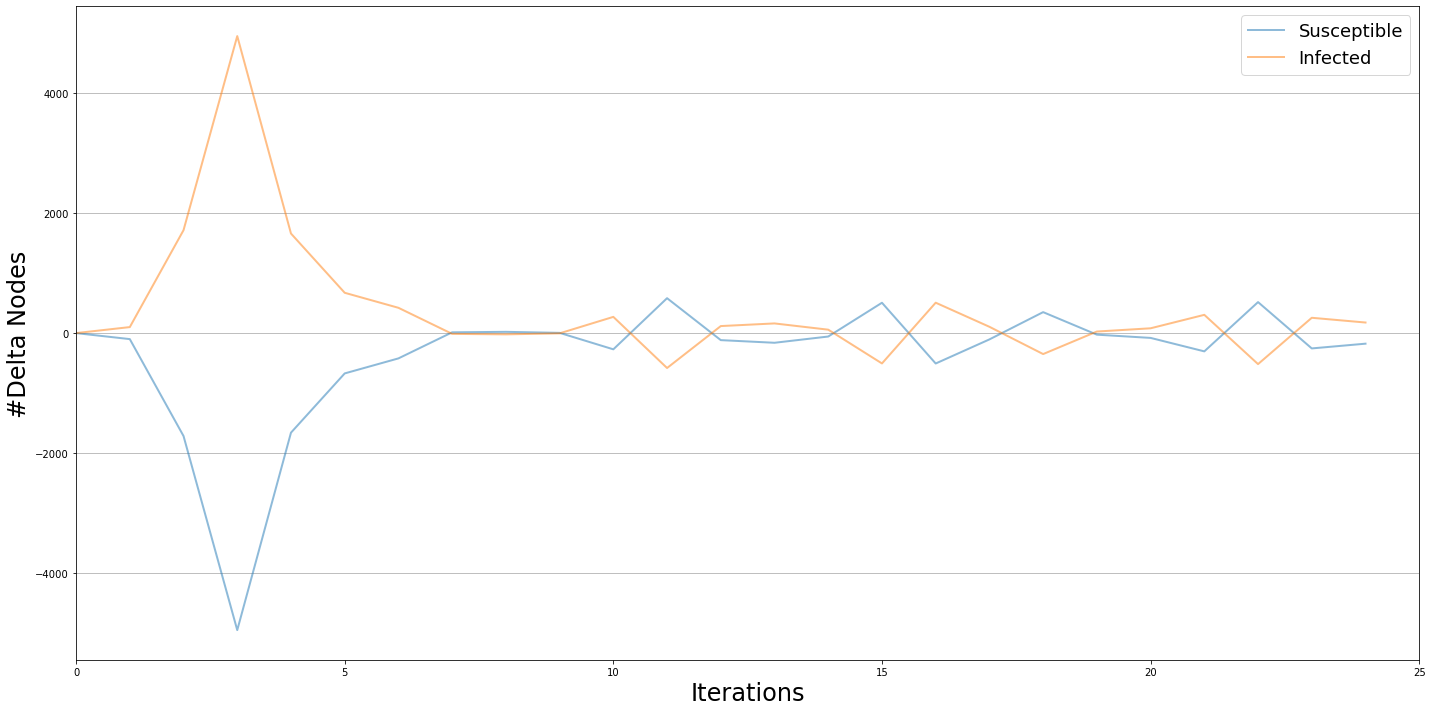

In [114]:
viz = DiffusionPrevalence(model2_2, trends2_2)
viz.plot()

## 2nd phase with higher infected % (40%, like the phase 1 simulation)

In [115]:
model2_2_40 = ep.SISModel(g)
model2_2_40.available_statuses

{'Susceptible': 0, 'Infected': 1}

In [116]:
cfg = mc.Configuration()
cfg.add_model_parameter('beta', b2) # infection rate
cfg.add_model_parameter('lambda', u2) # recovery rate
cfg.add_model_parameter("percentage_infected", 0.4)
model2_2_40.set_initial_status(cfg)

In [117]:
iterations = model2_2_40.iteration_bunch(25, node_status=True)
trends2_2_40 = model2_2_40.build_trends(iterations)

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:05<00:00,  4.69it/s]


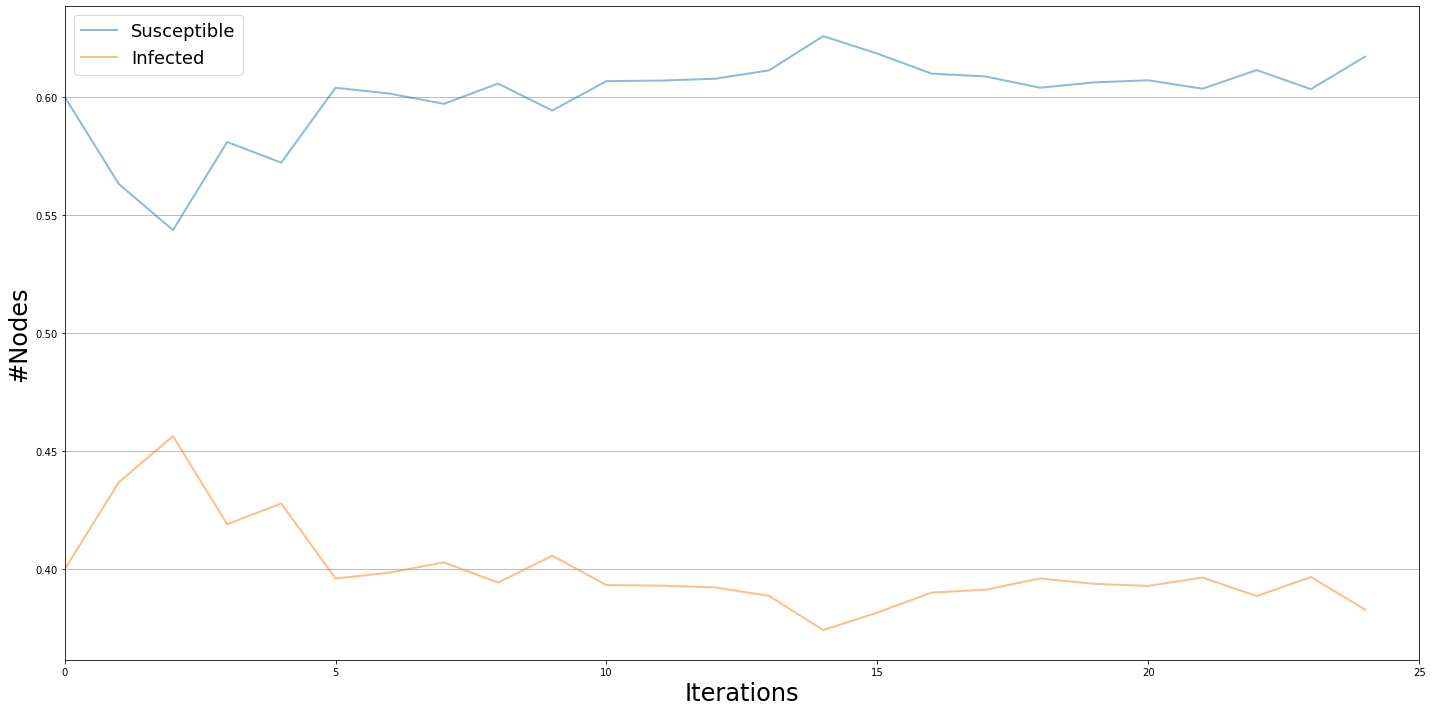

In [118]:
viz = DiffusionTrend(model2_2_40, trends2_2_40)
viz.plot()

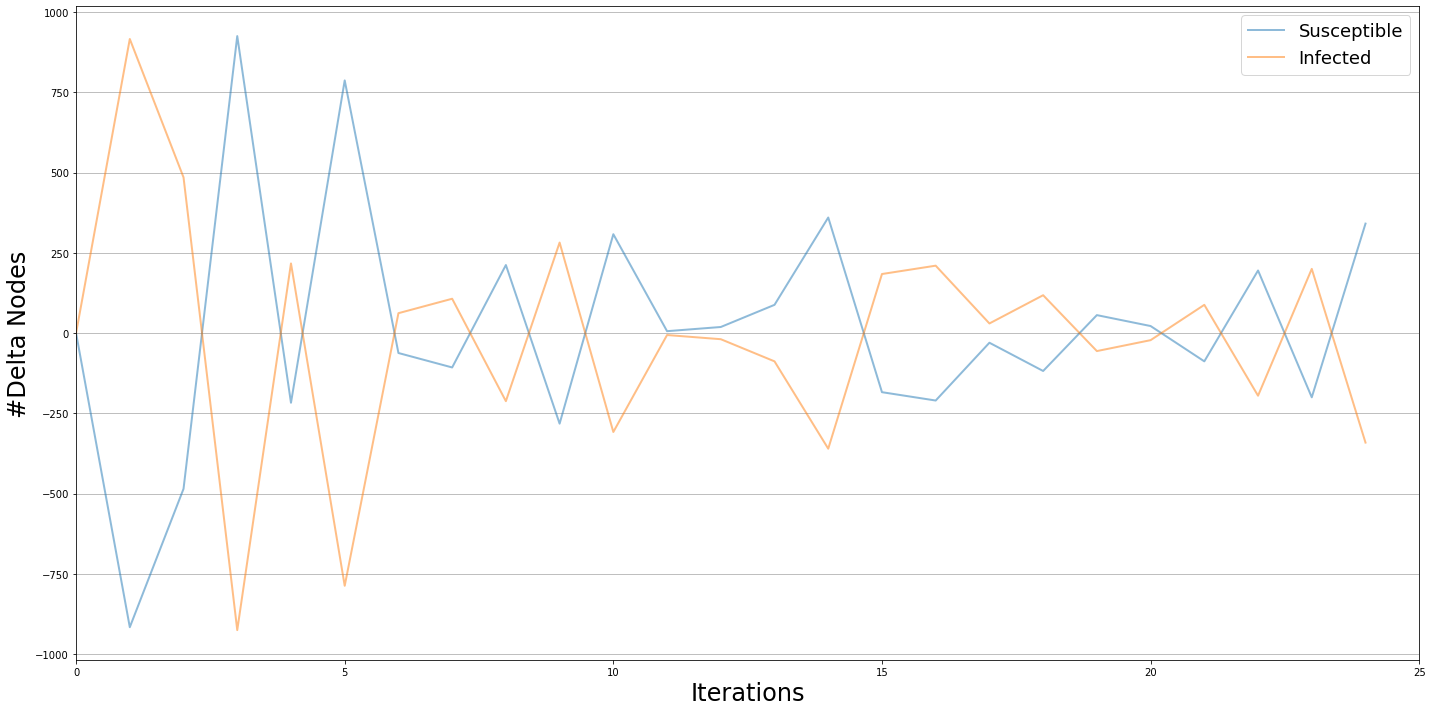

In [119]:
viz = DiffusionPrevalence(model2_2_40, trends2_2_40)
viz.plot()

## 2nd phase with very high % of infected at time 0

In [120]:
model2_2_70 = ep.SISModel(g)
cfg = mc.Configuration()
cfg.add_model_parameter('beta', b2) # infection rate
cfg.add_model_parameter('lambda', u2) # recovery rate
cfg.add_model_parameter("percentage_infected", 0.70)
model2_2_70.set_initial_status(cfg)
iterations = model2_2_70.iteration_bunch(25, node_status=True)
trends2_2_70 = model2_2_70.build_trends(iterations)

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:04<00:00,  5.22it/s]


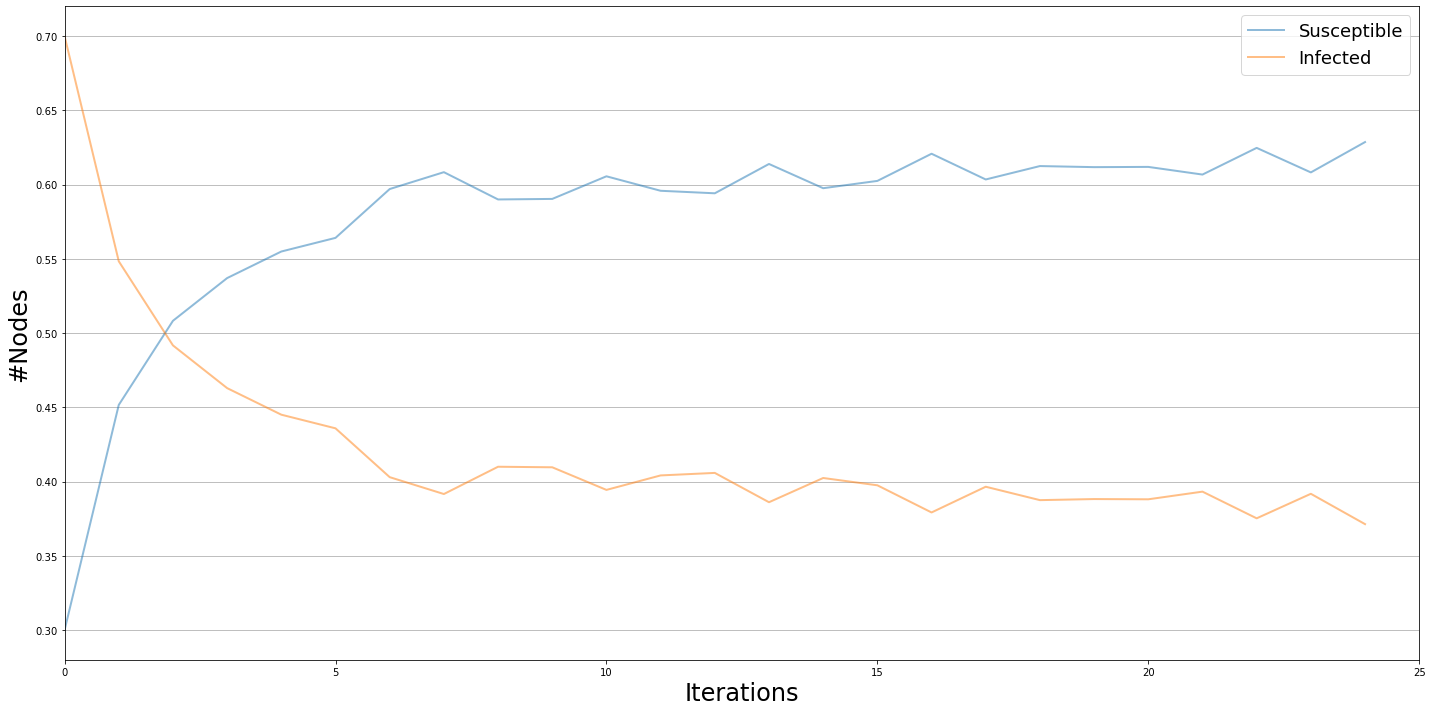

In [121]:
viz = DiffusionTrend(model2_2_70, trends2_2_70)
viz.plot()

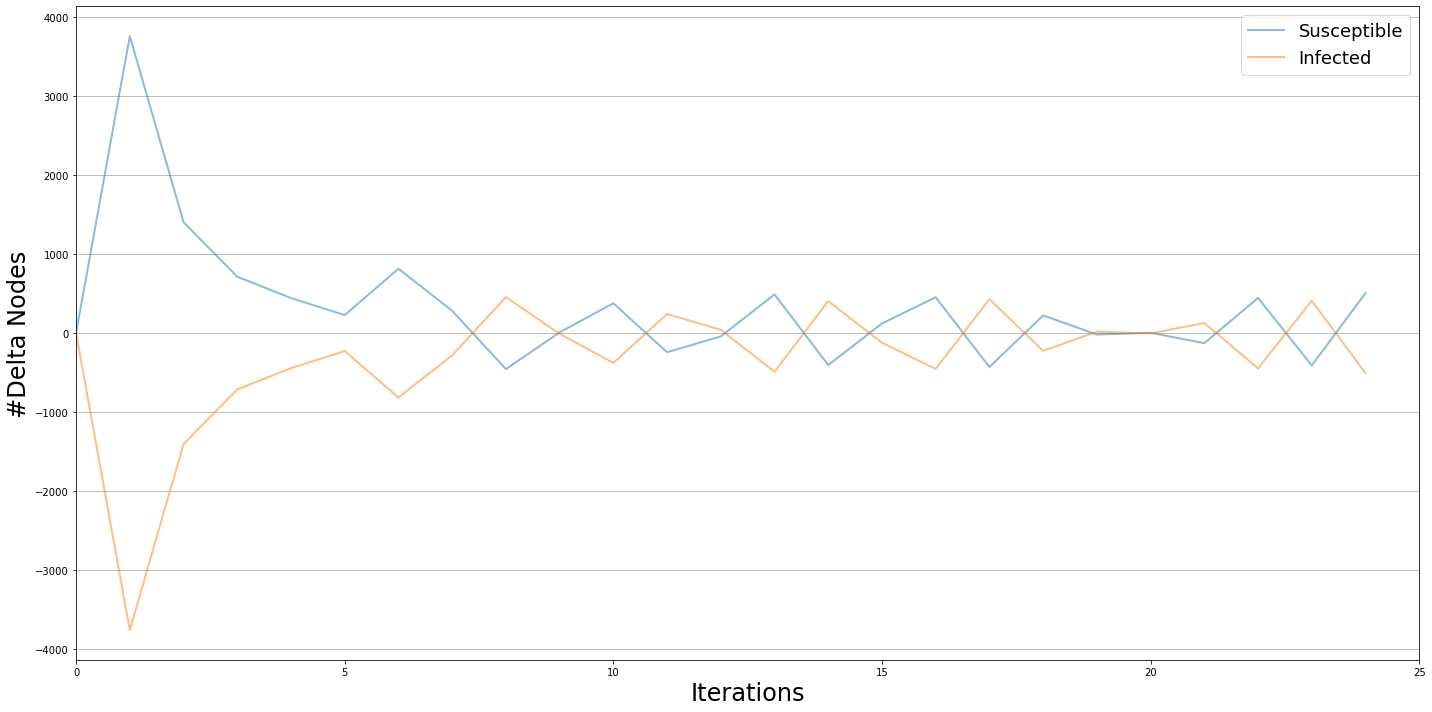

In [122]:
viz = DiffusionPrevalence(model2_2_70, trends2_2_70)
viz.plot()

## 2nd phase with neighbours of a node as infected nodes at time 0

In [123]:
model2_2_neigh = ep.SISModel(g)
model2_2_neigh.available_statuses

{'Susceptible': 0, 'Infected': 1}

In [124]:
cfg = mc.Configuration()
cfg.add_model_parameter('beta', b2) # infection rate
cfg.add_model_parameter('lambda', u2) # recovery rate
infected_nodes = list(g.neighbors('wallstreetbets'))
cfg.add_model_initial_configuration("Infected", infected_nodes)
model2_2_neigh.set_initial_status(cfg)

In [125]:
iterations = model2_2_neigh.iteration_bunch(25, node_status=True)
trends2_2_neigh = model2_2_neigh.build_trends(iterations)

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:05<00:00,  4.87it/s]


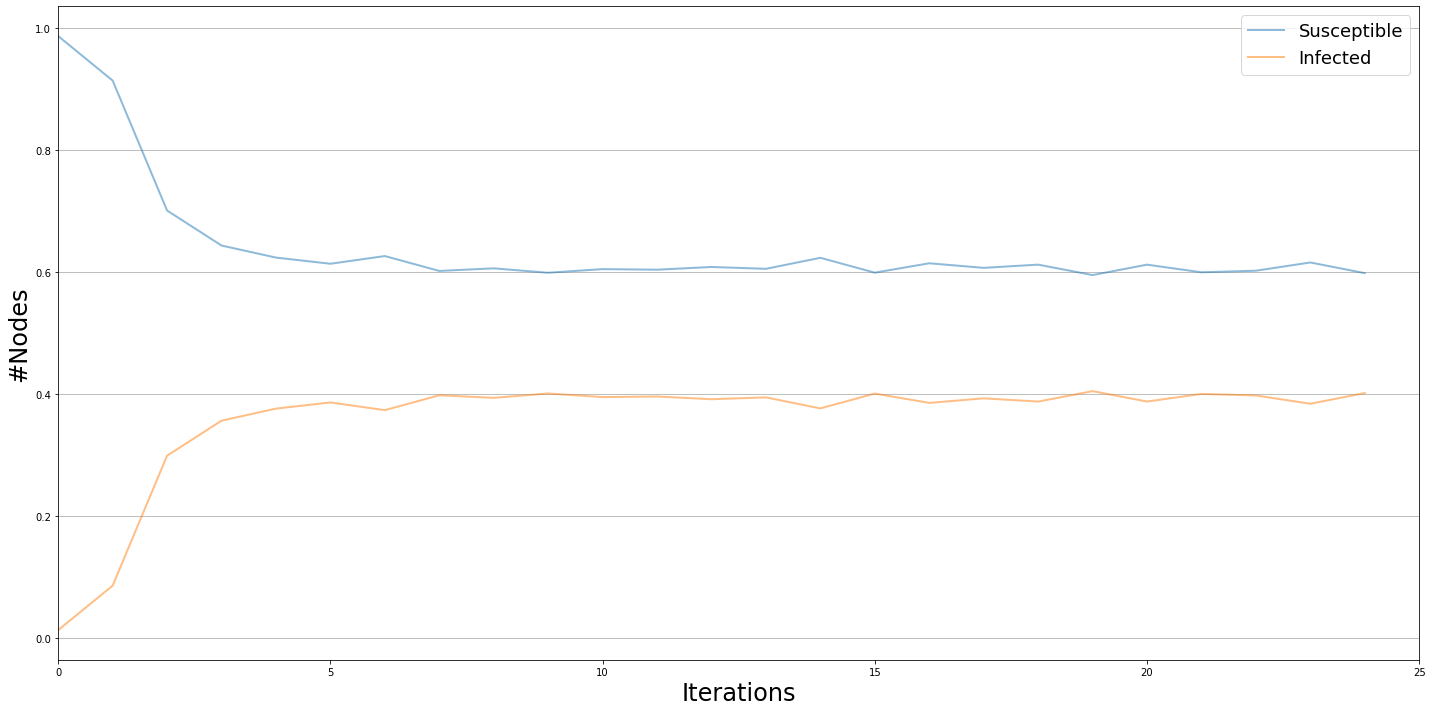

In [126]:
viz = DiffusionTrend(model2_2_neigh, trends2_2_neigh)
viz.plot()

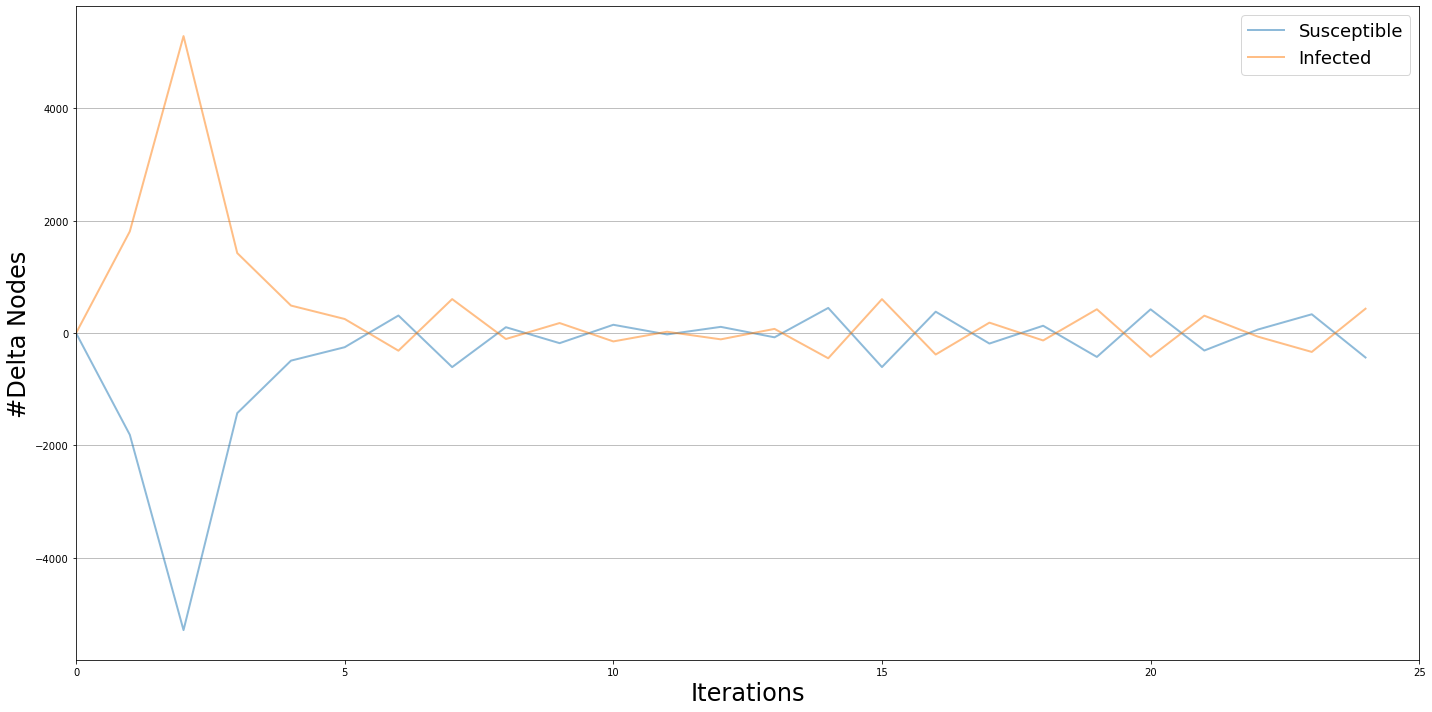

In [127]:
viz = DiffusionPrevalence(model2_2_neigh, trends2_2_neigh)
viz.plot()

## 2nd phase with the infected nodes of the 1st phase simulation

In [128]:
model2_2_i1 = ep.SISModel(g)
model2_2_i1.available_statuses

{'Susceptible': 0, 'Infected': 1}

In [129]:
cfg = mc.Configuration()
cfg.add_model_parameter('beta', b2) # infection rate
cfg.add_model_parameter('lambda', u2) # recovery rate
infected_nodes = infected_1
cfg.add_model_initial_configuration("Infected", infected_nodes)
model2_2_i1.set_initial_status(cfg)

In [130]:
iterations = model2_2_i1.iteration_bunch(25, node_status=True)
trends2_2_i1 = model2_2_i1.build_trends(iterations)

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:05<00:00,  4.20it/s]


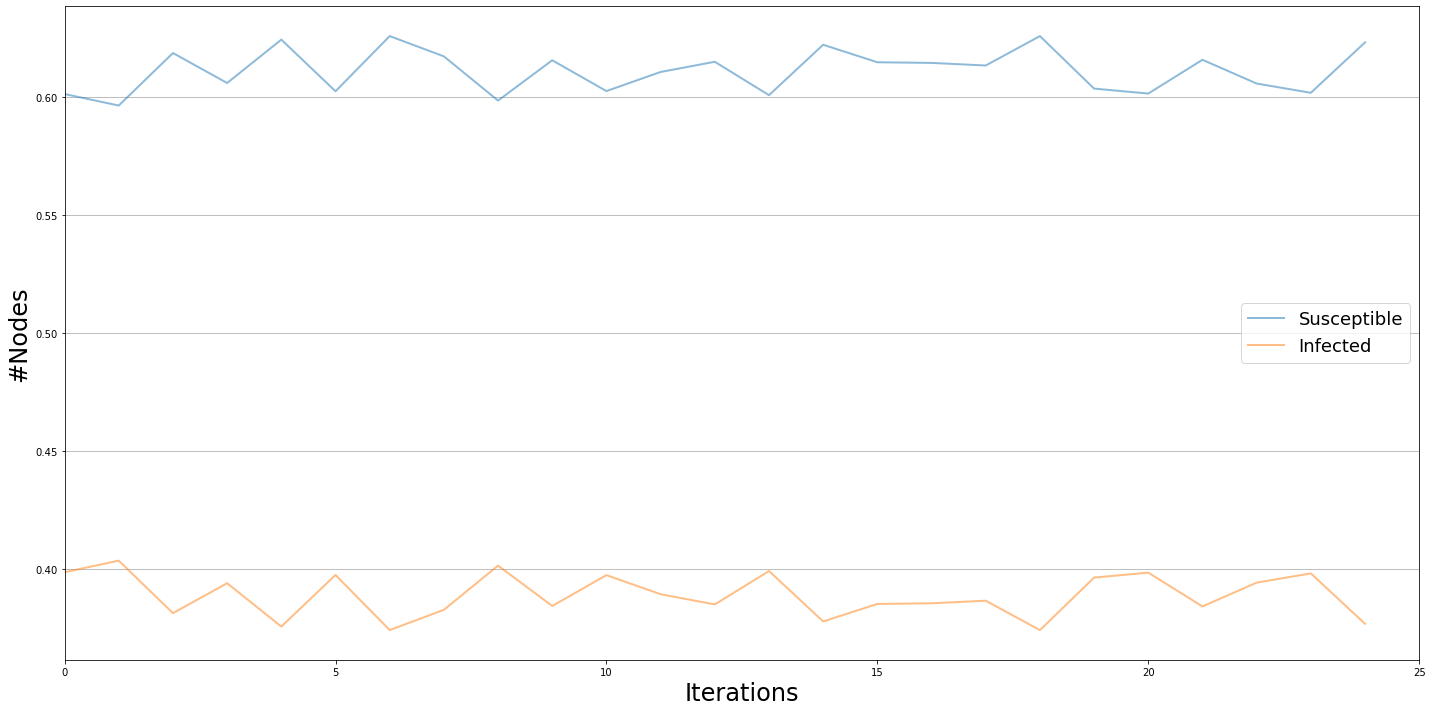

In [131]:
viz = DiffusionTrend(model2_2_i1, trends2_2_i1)
viz.plot()

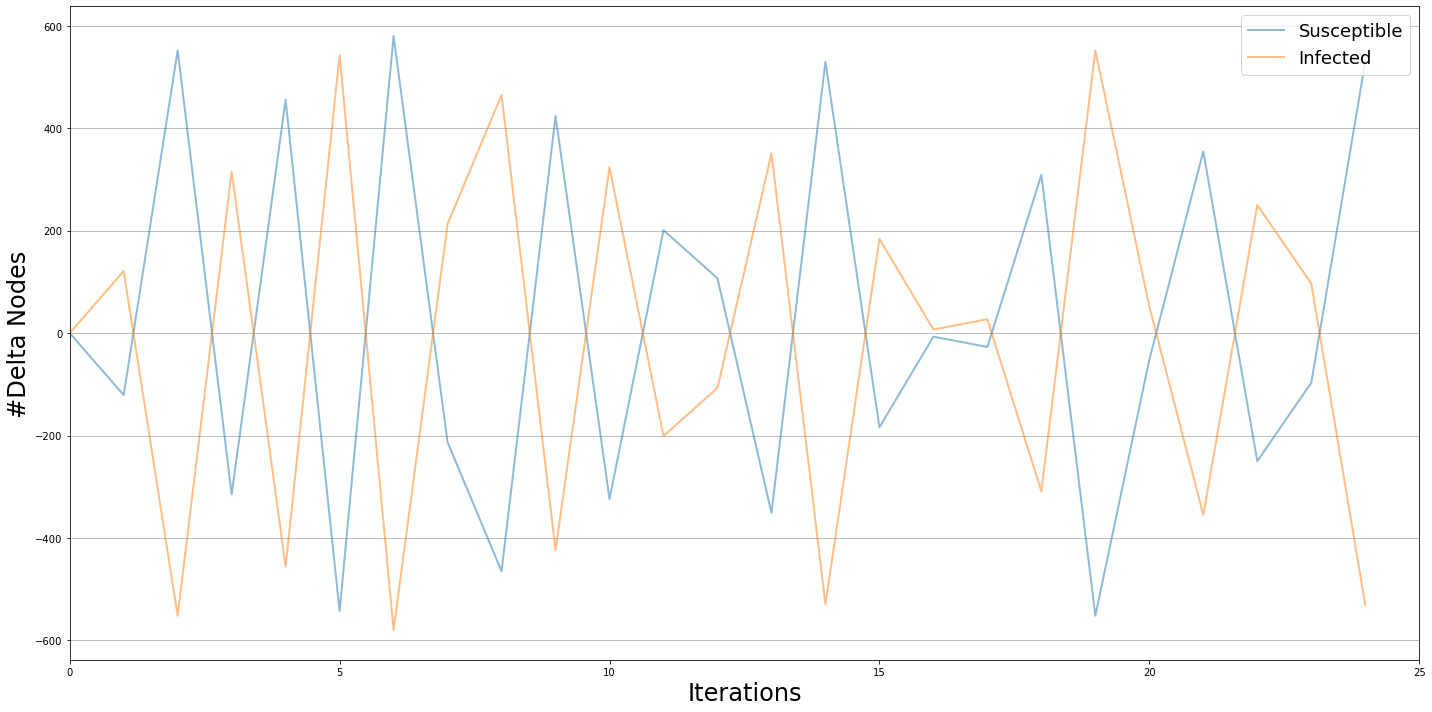

In [132]:
viz = DiffusionPrevalence(model2_2_i1, trends2_2_i1)
viz.plot()

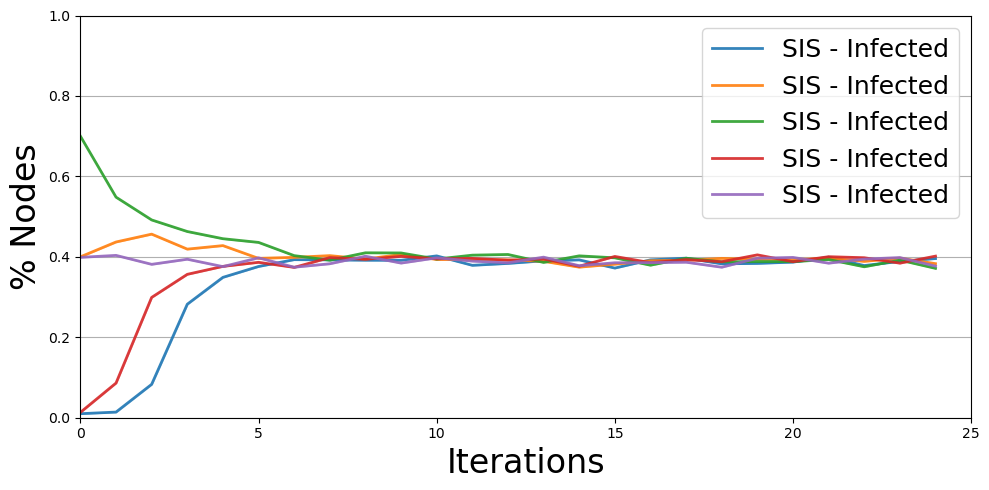

In [144]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})

# comparison of all the models
from ndlib.viz.mpl.TrendComparison import DiffusionTrendComparison
viz = DiffusionTrendComparison([model2_2, model2_2_40, model2_2_70, model2_2_neigh, model2_2_i1], [trends2_2, trends2_2_40, trends2_2_70, trends2_2_neigh, trends2_2_i1], statuses=['Infected'])
viz.plot()

+ blue: model with low % of already infected
+ yellow: model with 40% already infected
+ green: model with 70% already infected
+ red: model with neighbours of a node as the nodes already infected
+ purple: model with the infected nodes from the 1st phase simulation as the nodes already infected

The % of infected nodes and the topography influence heavily the way the spreading of the infection plays out

## 3rd phase

## Test 1: already infected at 7%

In [5]:
model_t1 = ep.SISModel(g)
model_t1.available_statuses

{'Susceptible': 0, 'Infected': 1}

In [6]:
# the % of already infected chosen to conform to the mathematical model

cfg = mc.Configuration()
cfg.add_model_parameter('beta', b3) # infection rate
cfg.add_model_parameter('lambda', (u3)) # recovery rate

cfg.add_model_parameter("percentage_infected", 0.07)
model_t1.set_initial_status(cfg)

In [7]:
iterations = model_t1.iteration_bunch(100, node_status=True)
trends_t1 = model_t1.build_trends(iterations)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:21<00:00,  4.65it/s]


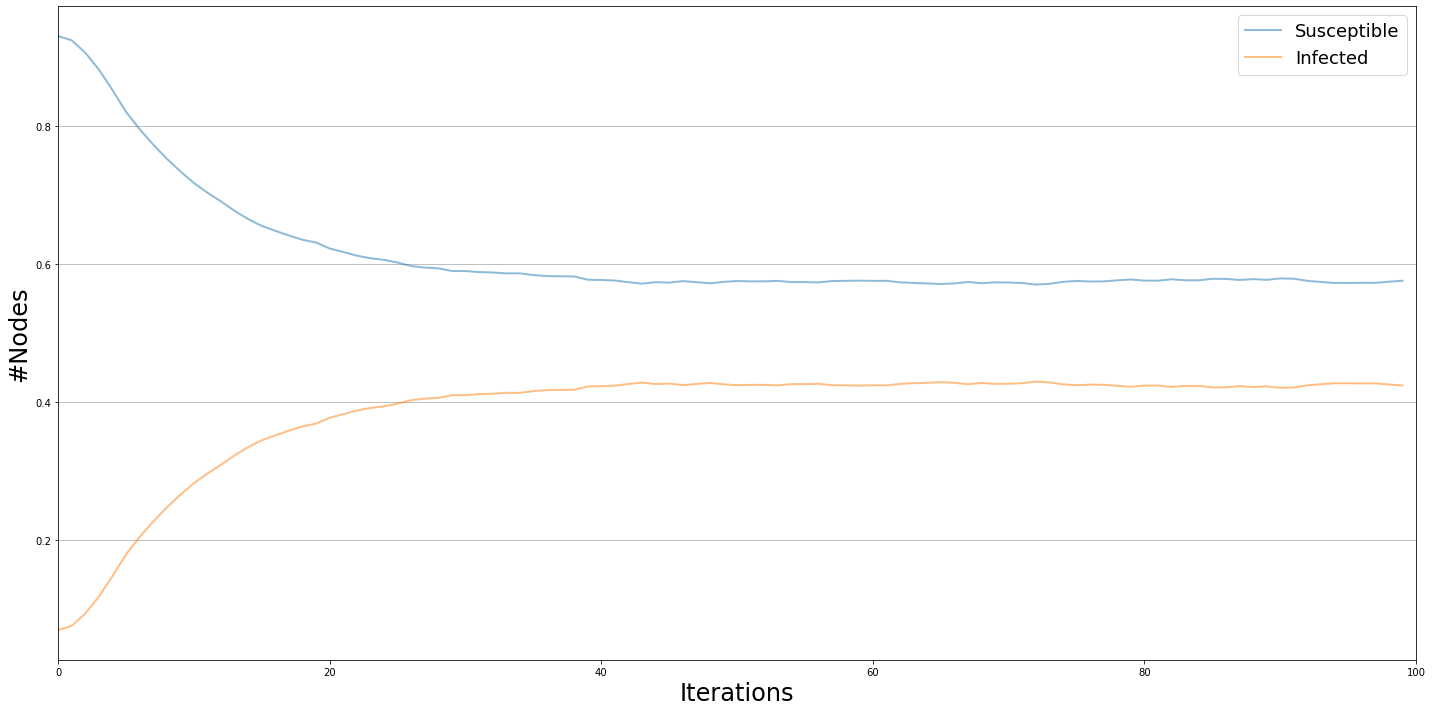

In [8]:
viz = DiffusionTrend(model_t1, trends_t1)
viz.plot()

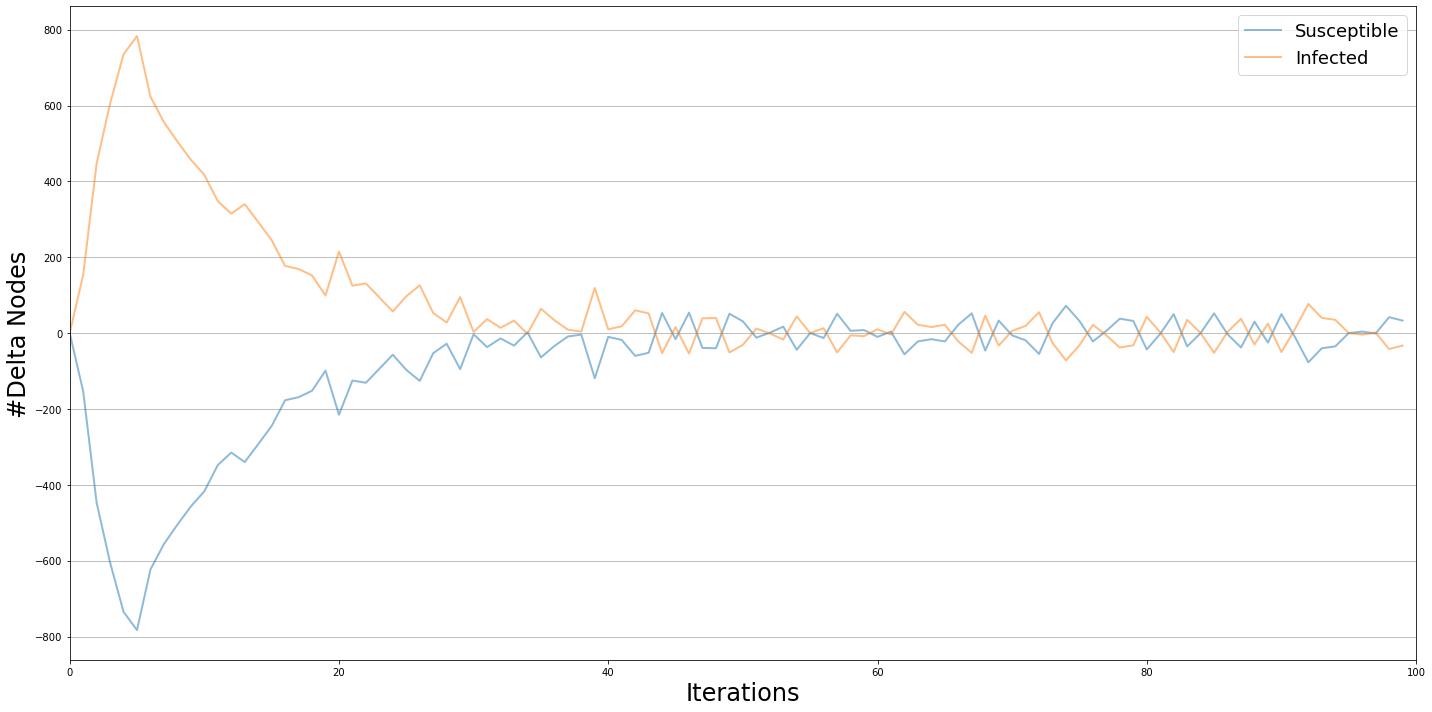

In [9]:
viz = DiffusionPrevalence(model_t1, trends_t1)
viz.plot()

## Test 2: 40% already infected
To conform with the simulations for the 2nd phase

In [10]:
model_t2 = ep.SISModel(g)
model_t2.available_statuses

{'Susceptible': 0, 'Infected': 1}

In [11]:
cfg = mc.Configuration()
cfg.add_model_parameter('beta', b3) # infection rate
cfg.add_model_parameter('lambda', u3) # recovery rate

cfg.add_model_parameter("percentage_infected", 0.4)
model_t2.set_initial_status(cfg)

In [12]:
iterations = model_t2.iteration_bunch(100, node_status=True)
trends_t2 = model_t2.build_trends(iterations)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:18<00:00,  5.33it/s]


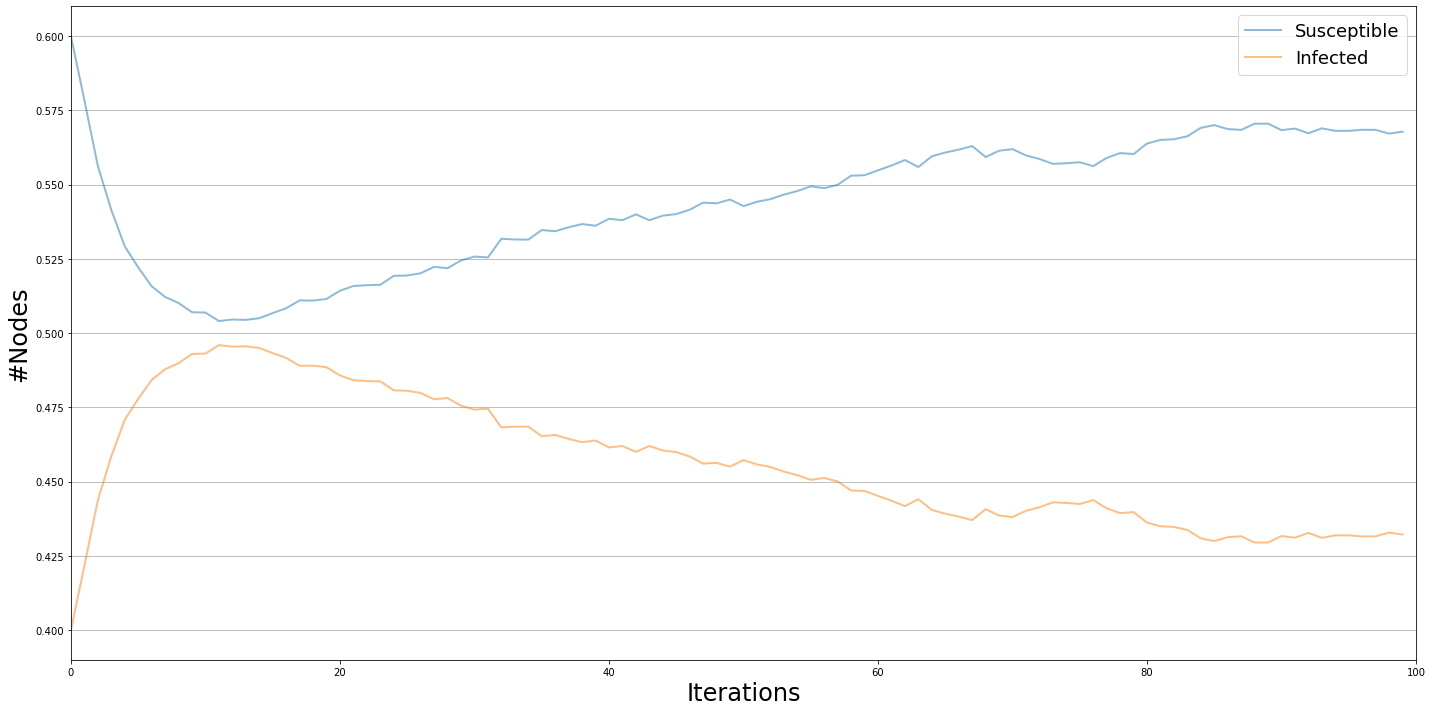

In [13]:
viz = DiffusionTrend(model_t2, trends_t2)
viz.plot()

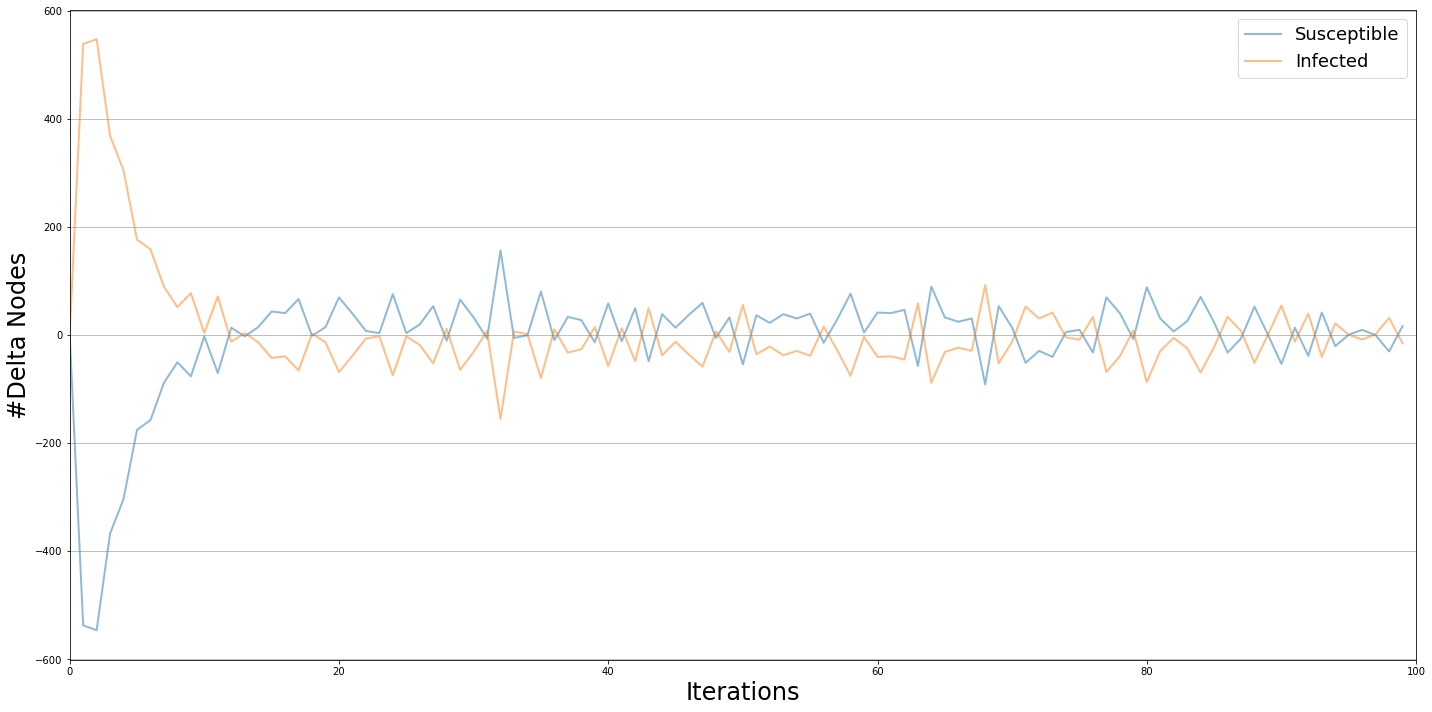

In [14]:
viz = DiffusionPrevalence(model_t2, trends_t2)
viz.plot()

## Test 3: 70% already infected

In [15]:
model_t3 = ep.SISModel(g)
model_t3.available_statuses

{'Susceptible': 0, 'Infected': 1}

In [16]:
cfg = mc.Configuration()
cfg.add_model_parameter('beta', b3) # infection rate
cfg.add_model_parameter('lambda', u3) # recovery rate

cfg.add_model_parameter("percentage_infected", 0.7)
model_t3.set_initial_status(cfg)

In [17]:
iterations = model_t3.iteration_bunch(100, node_status=True)
trends_t3 = model_t3.build_trends(iterations)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:20<00:00,  4.88it/s]


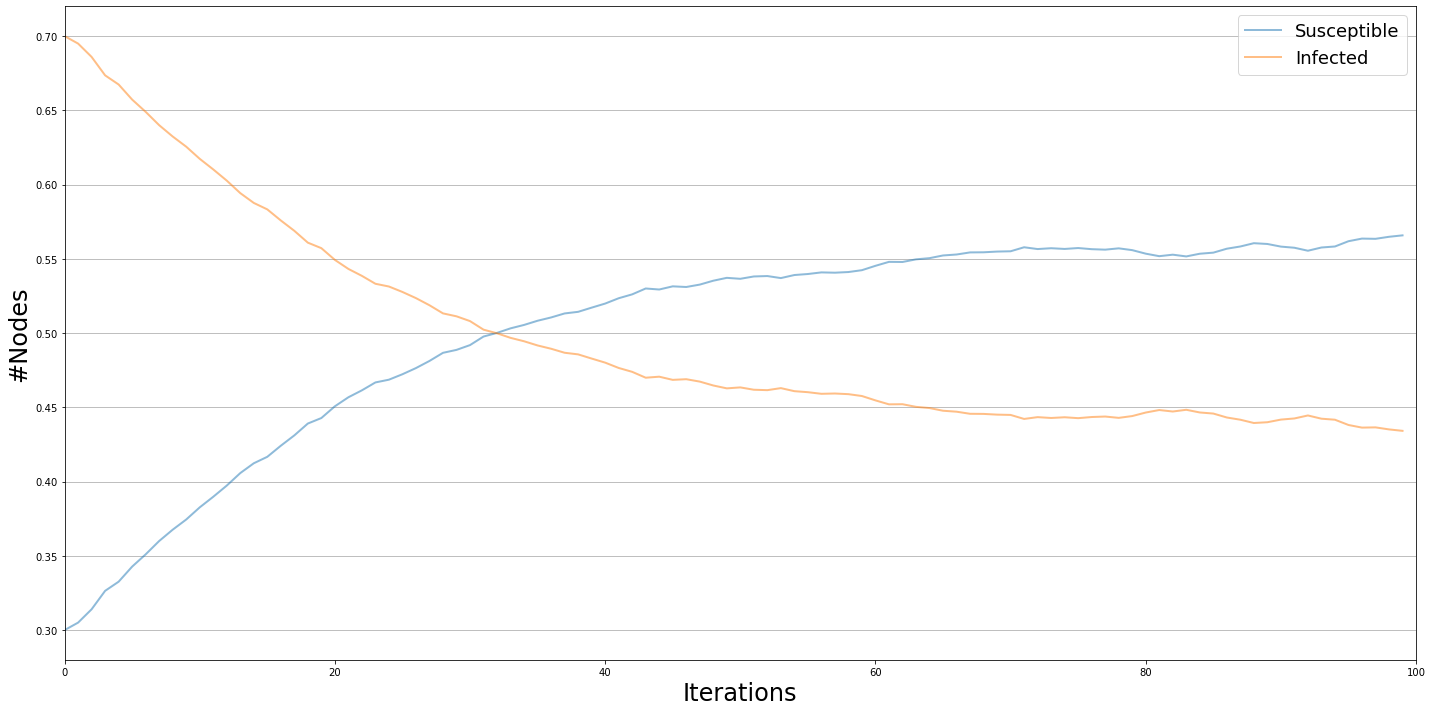

In [18]:
viz = DiffusionTrend(model_t3, trends_t3)
viz.plot()

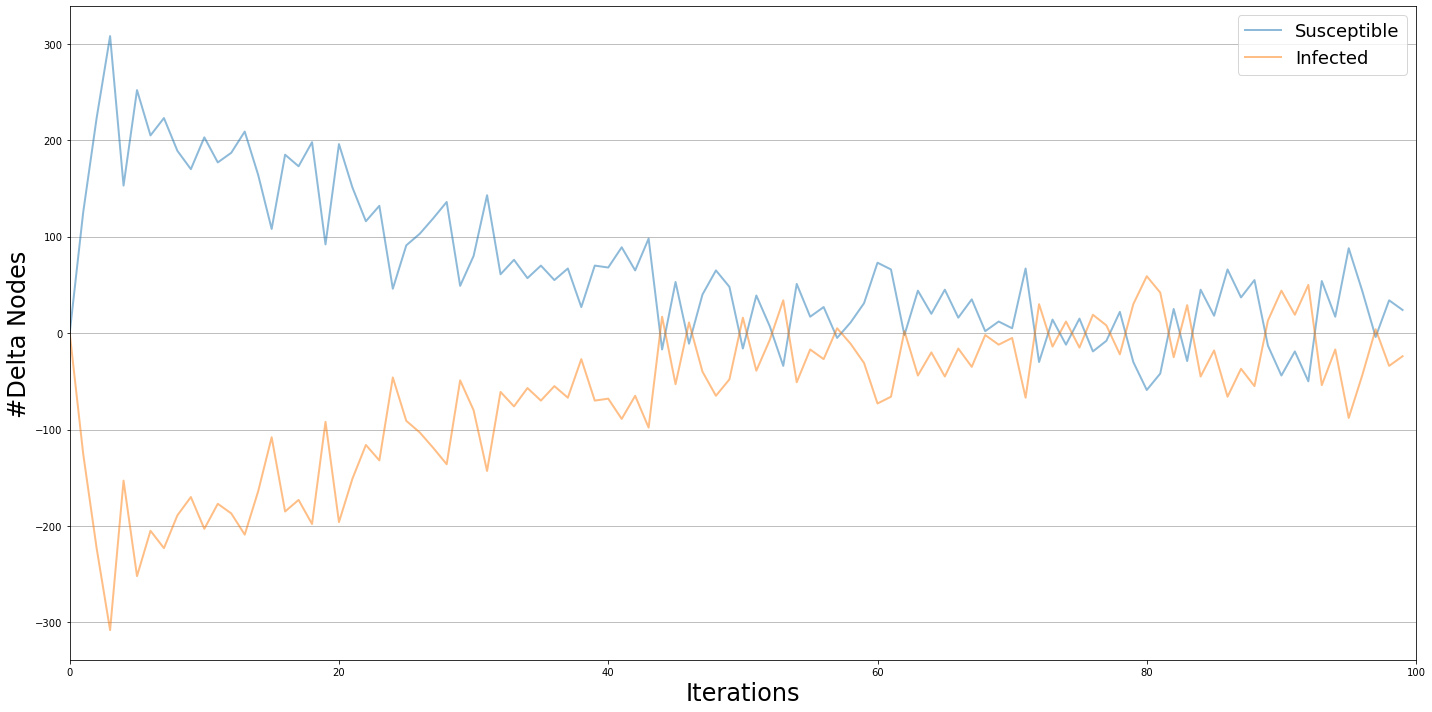

In [19]:
viz = DiffusionPrevalence(model_t3, trends_t3)
viz.plot()

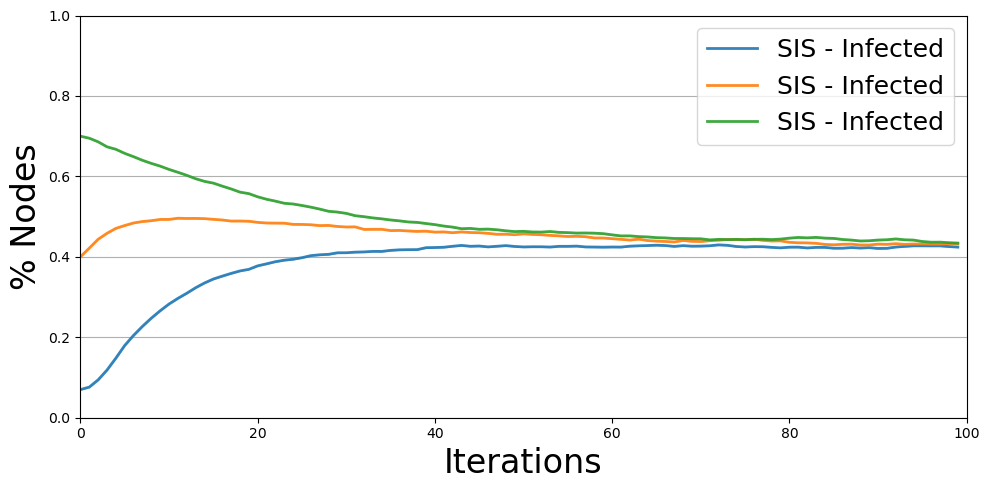

In [24]:
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
viz = DiffusionTrendComparison([model_t1, model_t2, model_t3], [trends_t1, trends_t2, trends_t3], statuses=['Infected'])
viz.plot()

The initial phase of the infection plays out differently based on how much the already infected nodes are, but they all end up converging.

# Comparisons with the behaviour in networks where nodes have been selected based on weight and number of interactions

Weights of nodes have a range between 0 and 13.

## Weight >2

In [31]:
# directed graph of nodes with weights >2

g2 = nx.read_edgelist("D:/Dati PRAW/Project_Social_Network_Analysis-main/Project_Social_Network_Analysis-main/scraping data/data/soglia2.csv", delimiter=",", nodetype=str, create_using=nx.DiGraph())

n_nodes2 = g2.number_of_nodes()
n_edges2 = g2.number_of_edges()

print(n_nodes2, ",", n_edges2)

17996 , 77140


### 1st phase

In [34]:
model_s2_2_1 = ep.SISModel(g2)

In [35]:
cfg = mc.Configuration()
cfg.add_model_parameter('beta', b1) # infection rate
cfg.add_model_parameter('lambda', u1) # recovery rate
infected_nodes = ['wallstreetbets']
cfg.add_model_initial_configuration("Infected", infected_nodes)
model_s2_2_1.set_initial_status(cfg)
iterations = model_s2_2_1.iteration_bunch(20, node_status=True)
trends_s2_2_1 = model_s2_2_1.build_trends(iterations)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  7.62it/s]


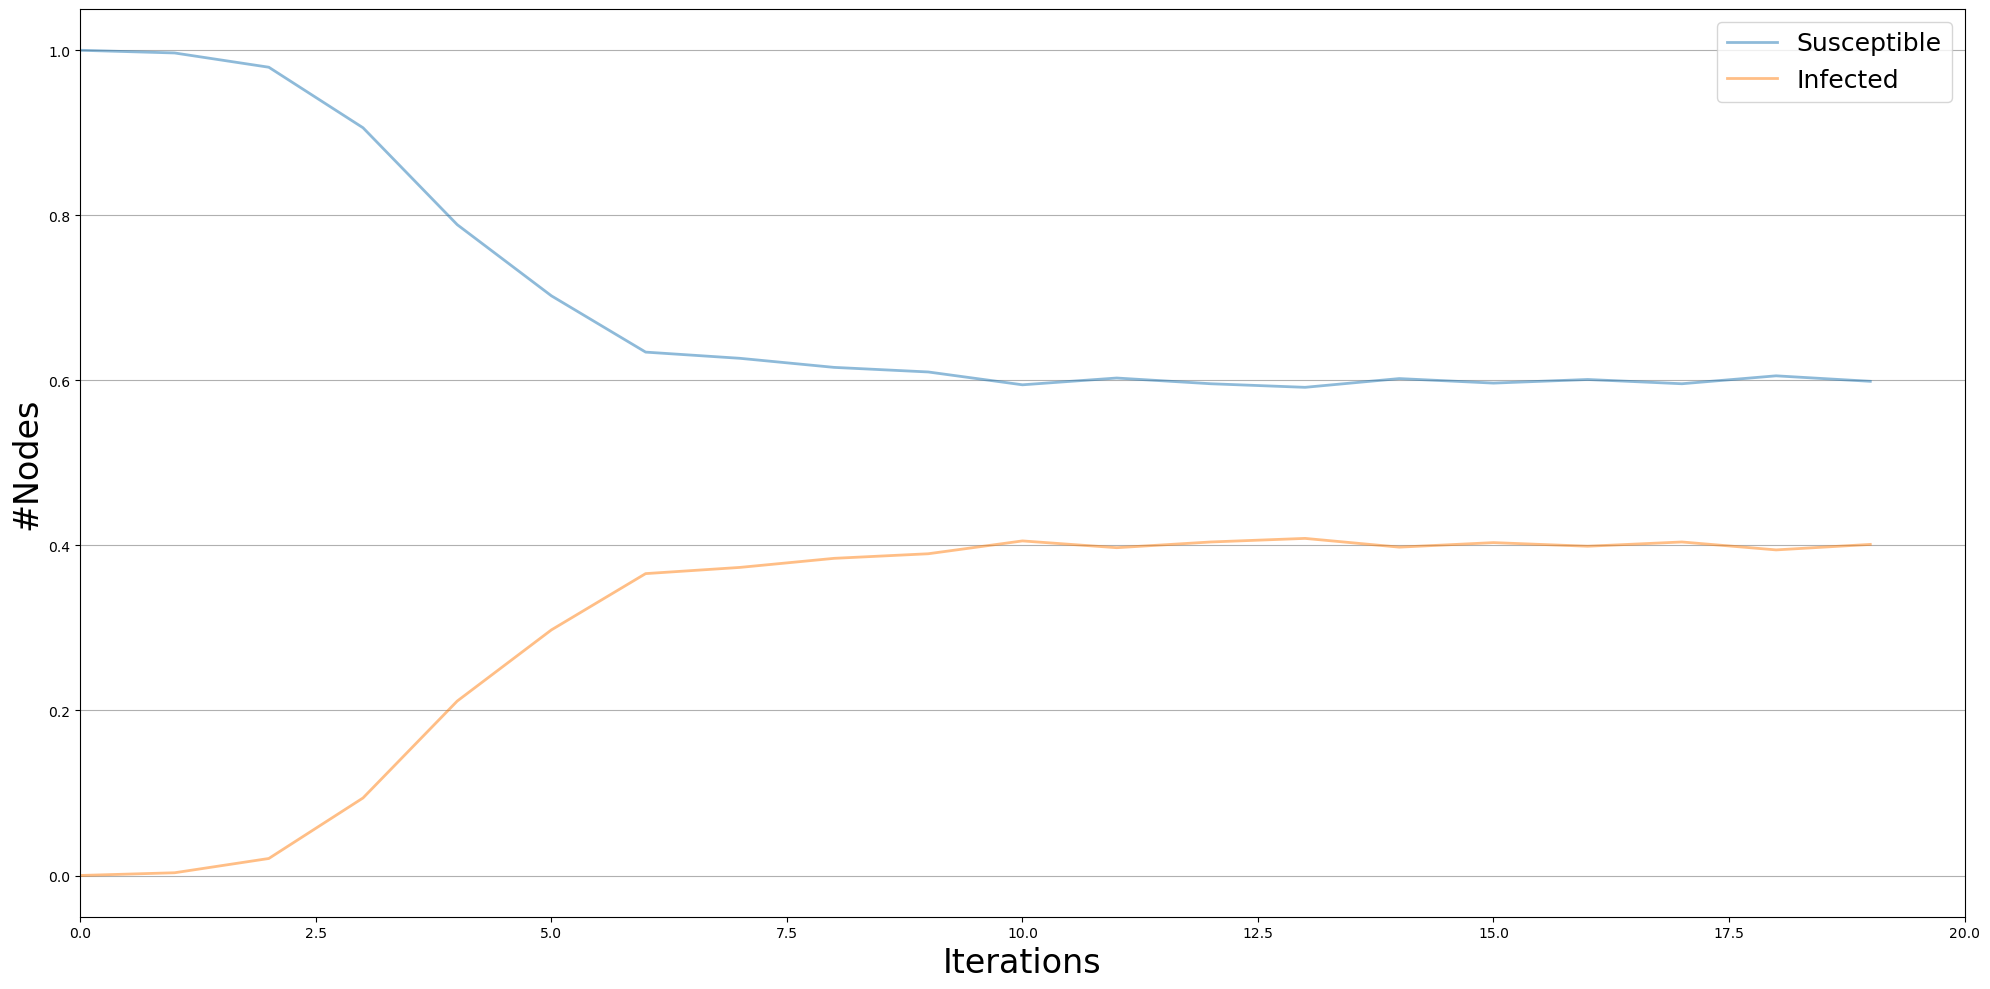

In [37]:
viz = DiffusionTrend(model_s2_2_1, trends_s2_2_1)
viz.plot()

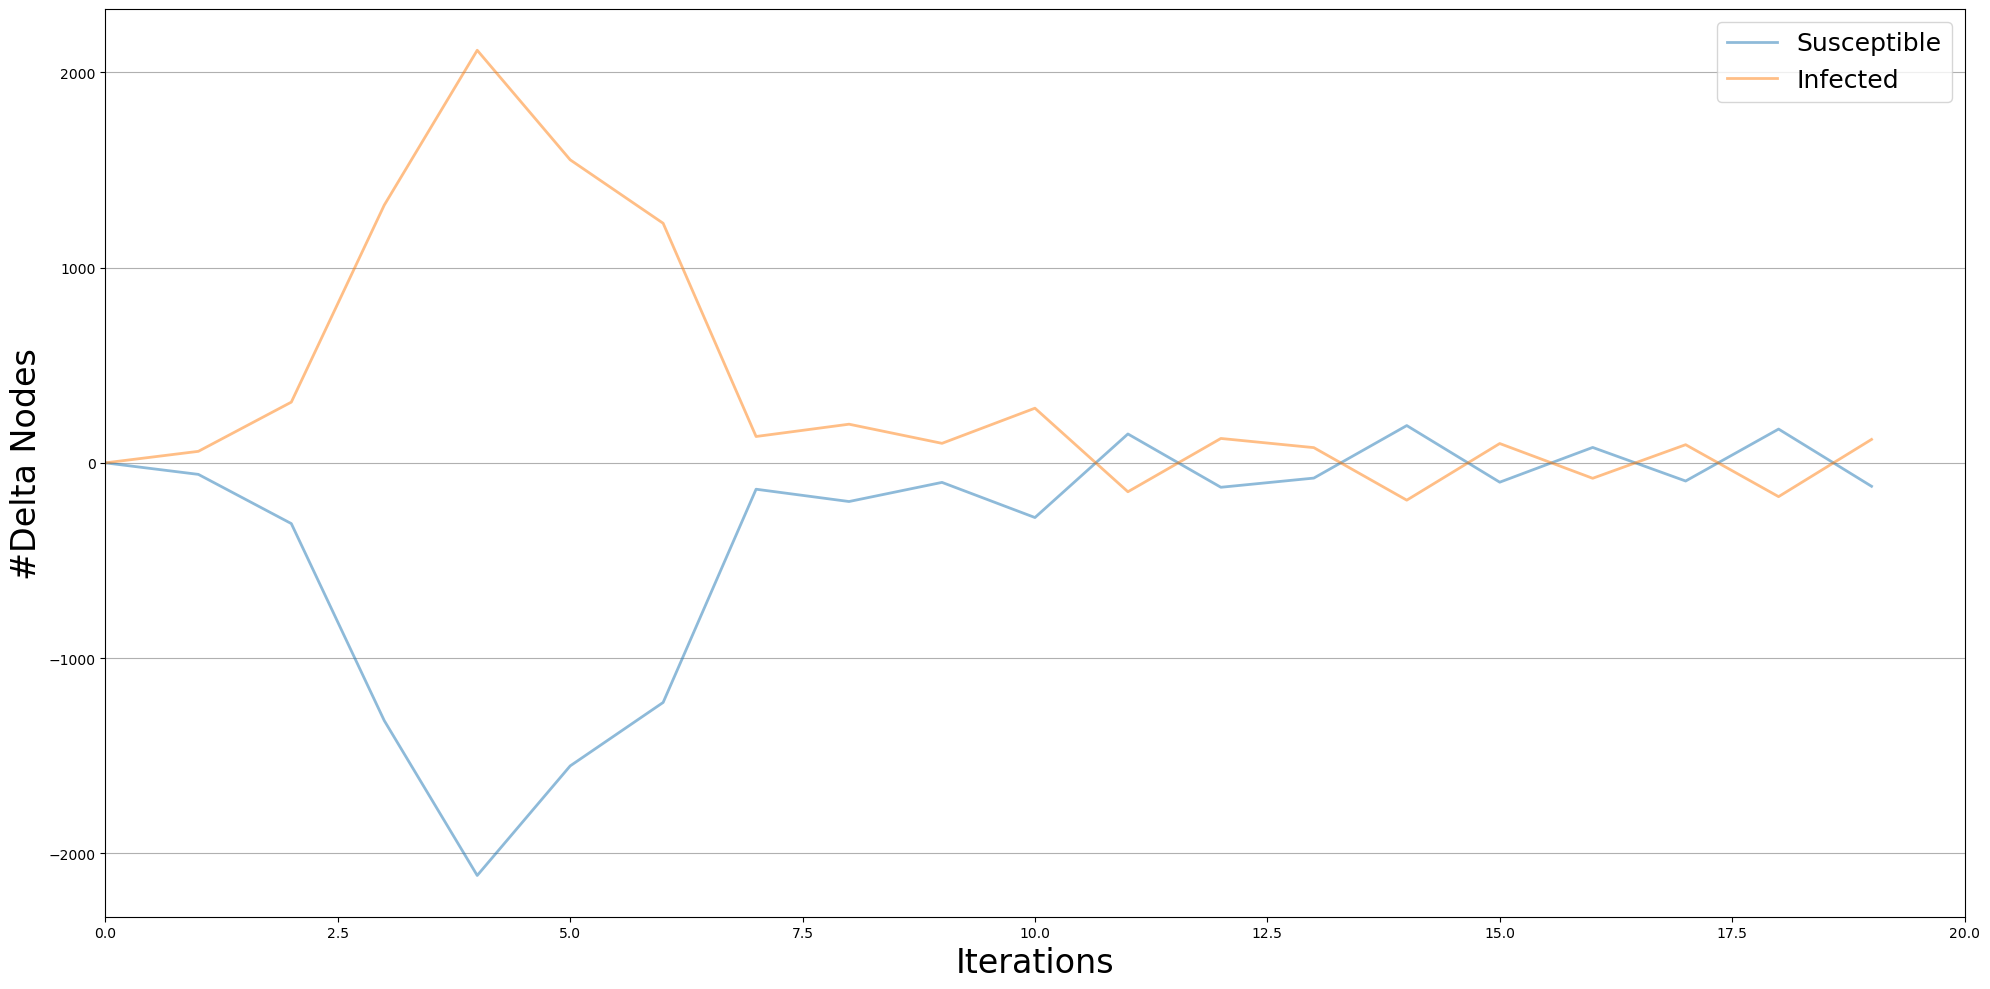

In [38]:
viz = DiffusionPrevalence(model_s2_2_1, trends_s2_2_1)
viz.plot()

### 2nd phase

In [59]:
model_s2_2_2 = ep.SISModel(g2)
cfg = mc.Configuration()
cfg.add_model_parameter('beta', b2) # infection rate
cfg.add_model_parameter('lambda', u2) # recovery rate
cfg.add_model_parameter("percentage_infected", 0.01)
model_s2_2_2.set_initial_status(cfg)
iterations = model_s2_2_2.iteration_bunch(25, node_status=True)
trends_s2_2_2 = model_s2_2_2.build_trends(iterations)

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:03<00:00,  6.97it/s]


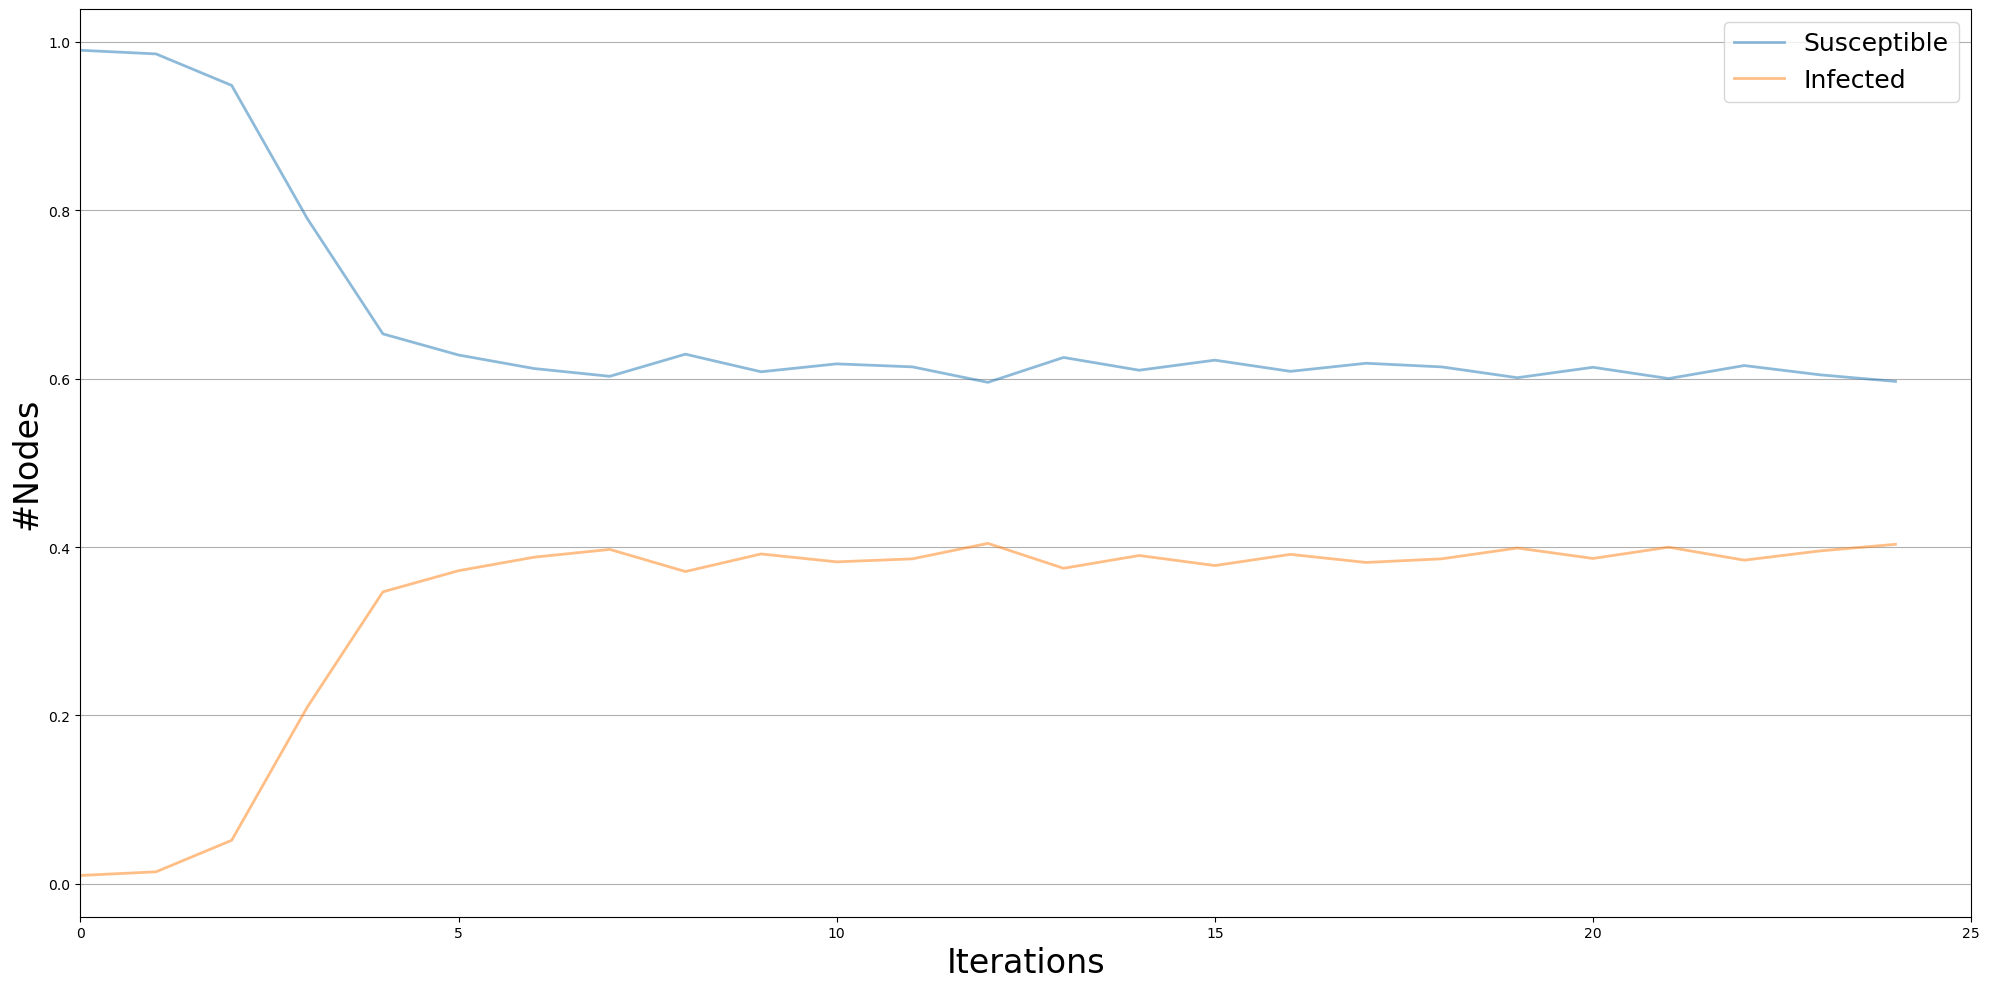

In [60]:
viz = DiffusionTrend(model_s2_2_2, trends_s2_2_2)
viz.plot()

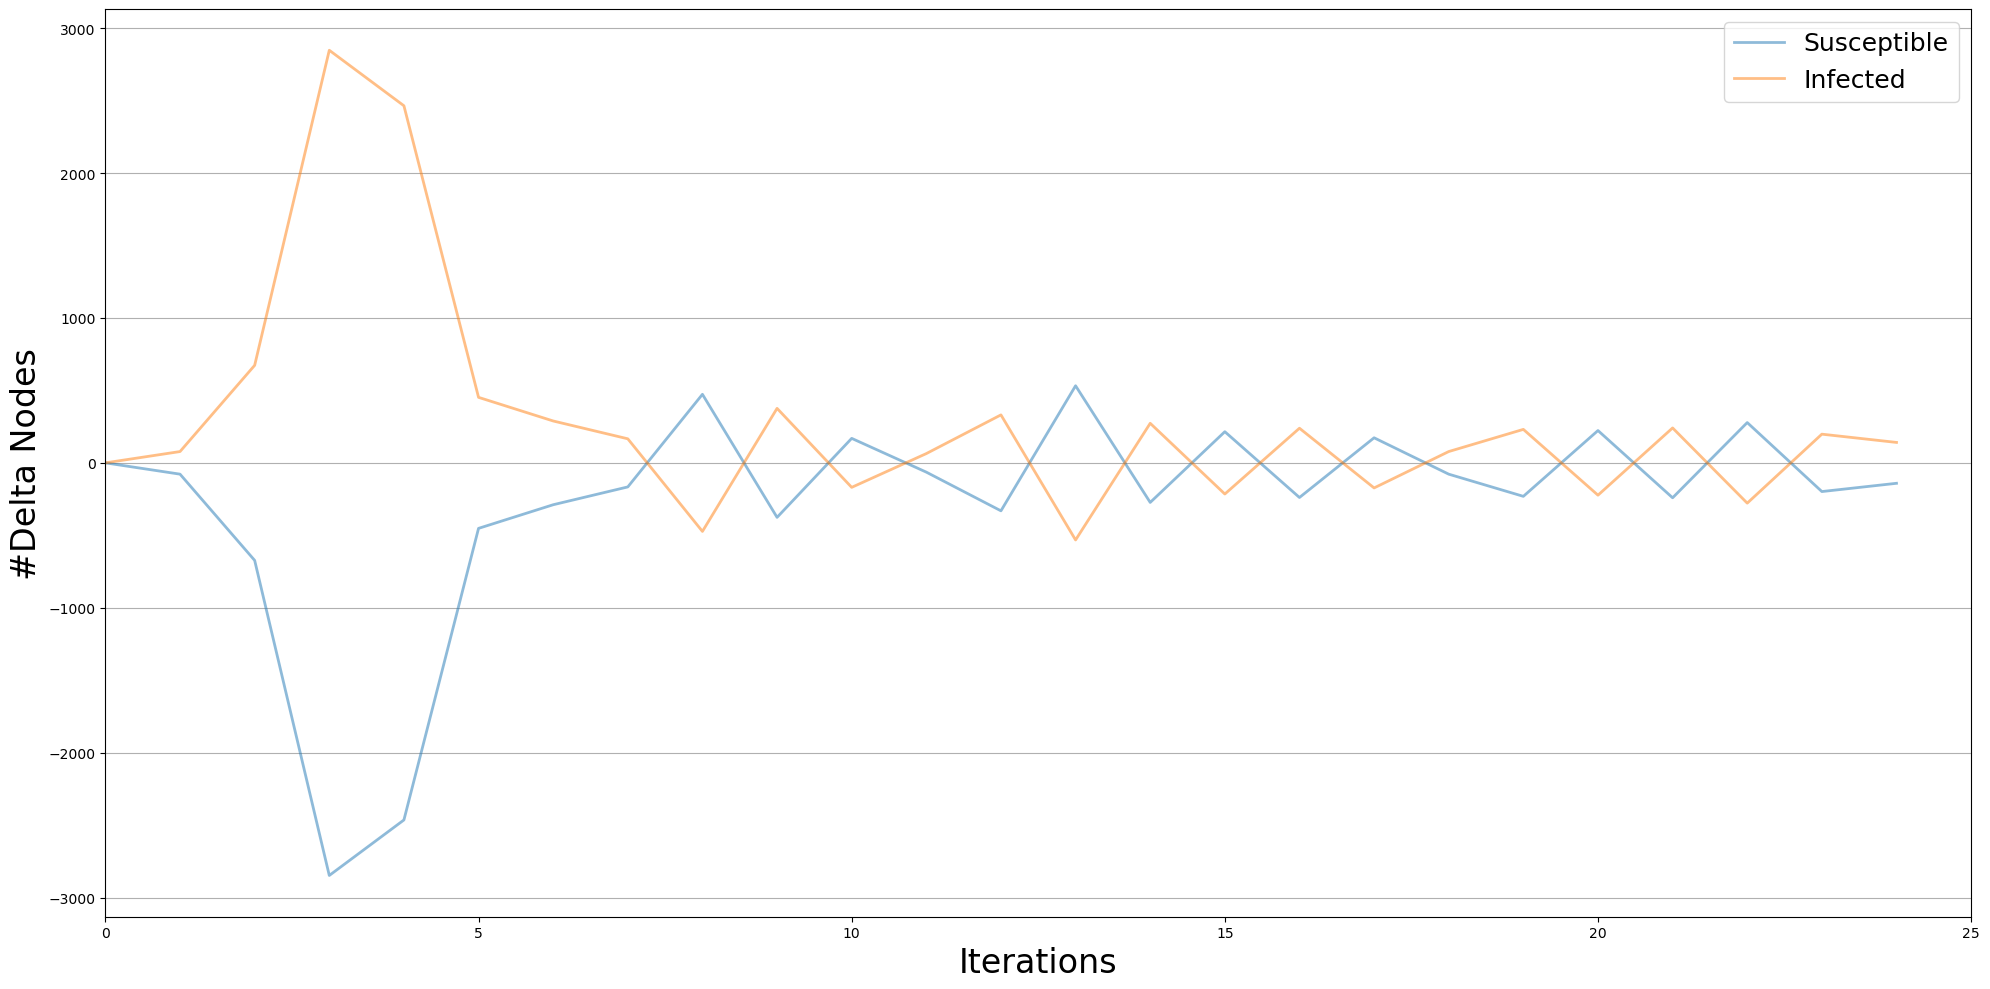

In [61]:
viz = DiffusionPrevalence(model_s2_2_2, trends_s2_2_2)
viz.plot()

### 3rd phase (with 40% already infected)

In [71]:
model_s2_3_40 = ep.SISModel(g2)
cfg = mc.Configuration()
cfg.add_model_parameter('beta', b3) # infection rate
cfg.add_model_parameter('lambda', u3) # recovery rate
cfg.add_model_parameter("percentage_infected", 0.4)
model_s2_3_40.set_initial_status(cfg)
iterations = model_s2_3_40.iteration_bunch(50, node_status=True)
trends_s2_3_40 = model_s2_3_40.build_trends(iterations)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:06<00:00,  8.04it/s]


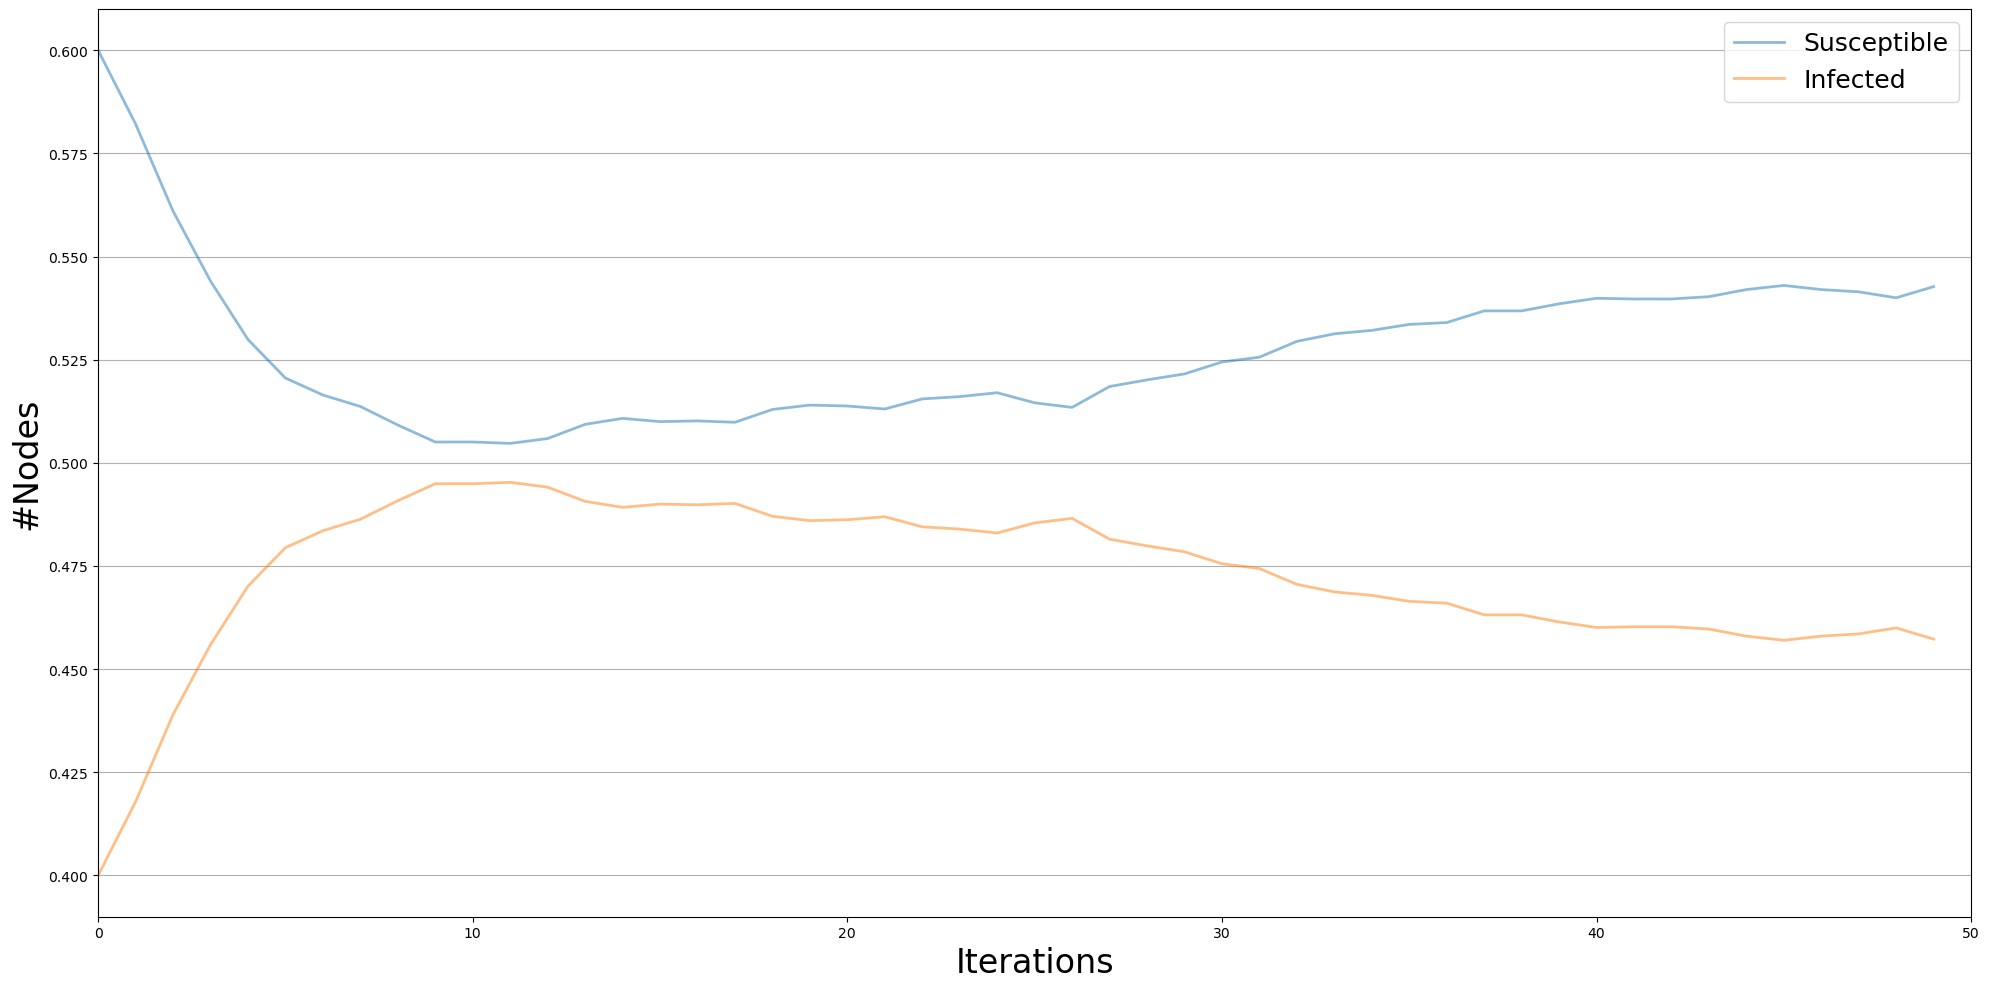

In [72]:
viz = DiffusionTrend(model_s2_3_40, trends_s2_3_40)
viz.plot()

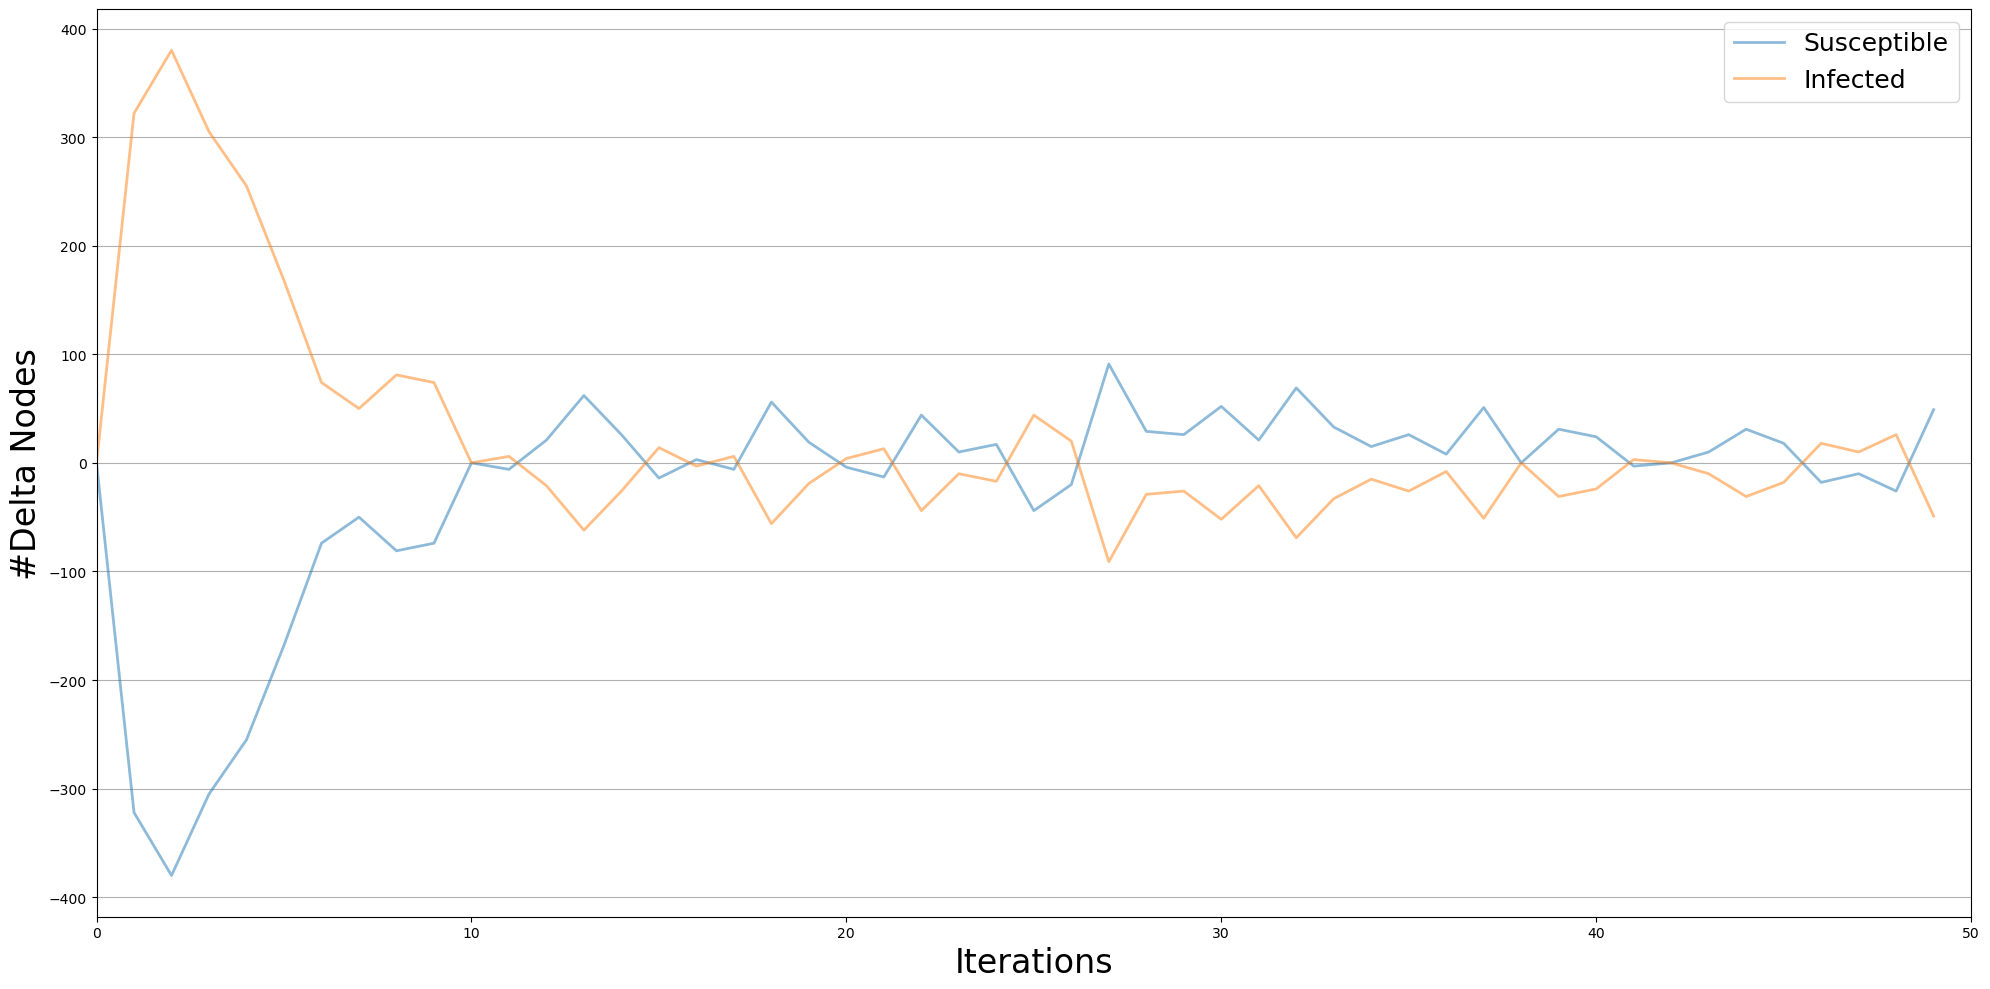

In [73]:
viz = DiffusionPrevalence(model_s2_3_40, trends_s2_3_40)
viz.plot()

Compared to the real network, there doesn't seem to have been a significant change in behaviour in the first two phases, while in the third phase the drop of the % of infected happens slower than in the complete network.

## Weight >4

In [75]:
# directed graph of nodes with weights >4

g4 = nx.read_edgelist("D:/Dati PRAW/Project_Social_Network_Analysis-main/Project_Social_Network_Analysis-main/scraping data/data/soglia4.csv", delimiter=",", nodetype=str, create_using=nx.DiGraph())

n_nodes4 = g4.number_of_nodes()
n_edges4 = g4.number_of_edges()

print(n_nodes4, ",", n_edges4)

10710 , 42447


### 1st phase

In [76]:
model_s4_2_1 = ep.SISModel(g4)

In [77]:
cfg = mc.Configuration()
cfg.add_model_parameter('beta', b1) # infection rate
cfg.add_model_parameter('lambda', u1) # recovery rate
infected_nodes = ['wallstreetbets']
cfg.add_model_initial_configuration("Infected", infected_nodes)
model_s4_2_1.set_initial_status(cfg)
iterations = model_s4_2_1.iteration_bunch(20, node_status=True)
trends_s4_2_1 = model_s4_2_1.build_trends(iterations)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 14.23it/s]


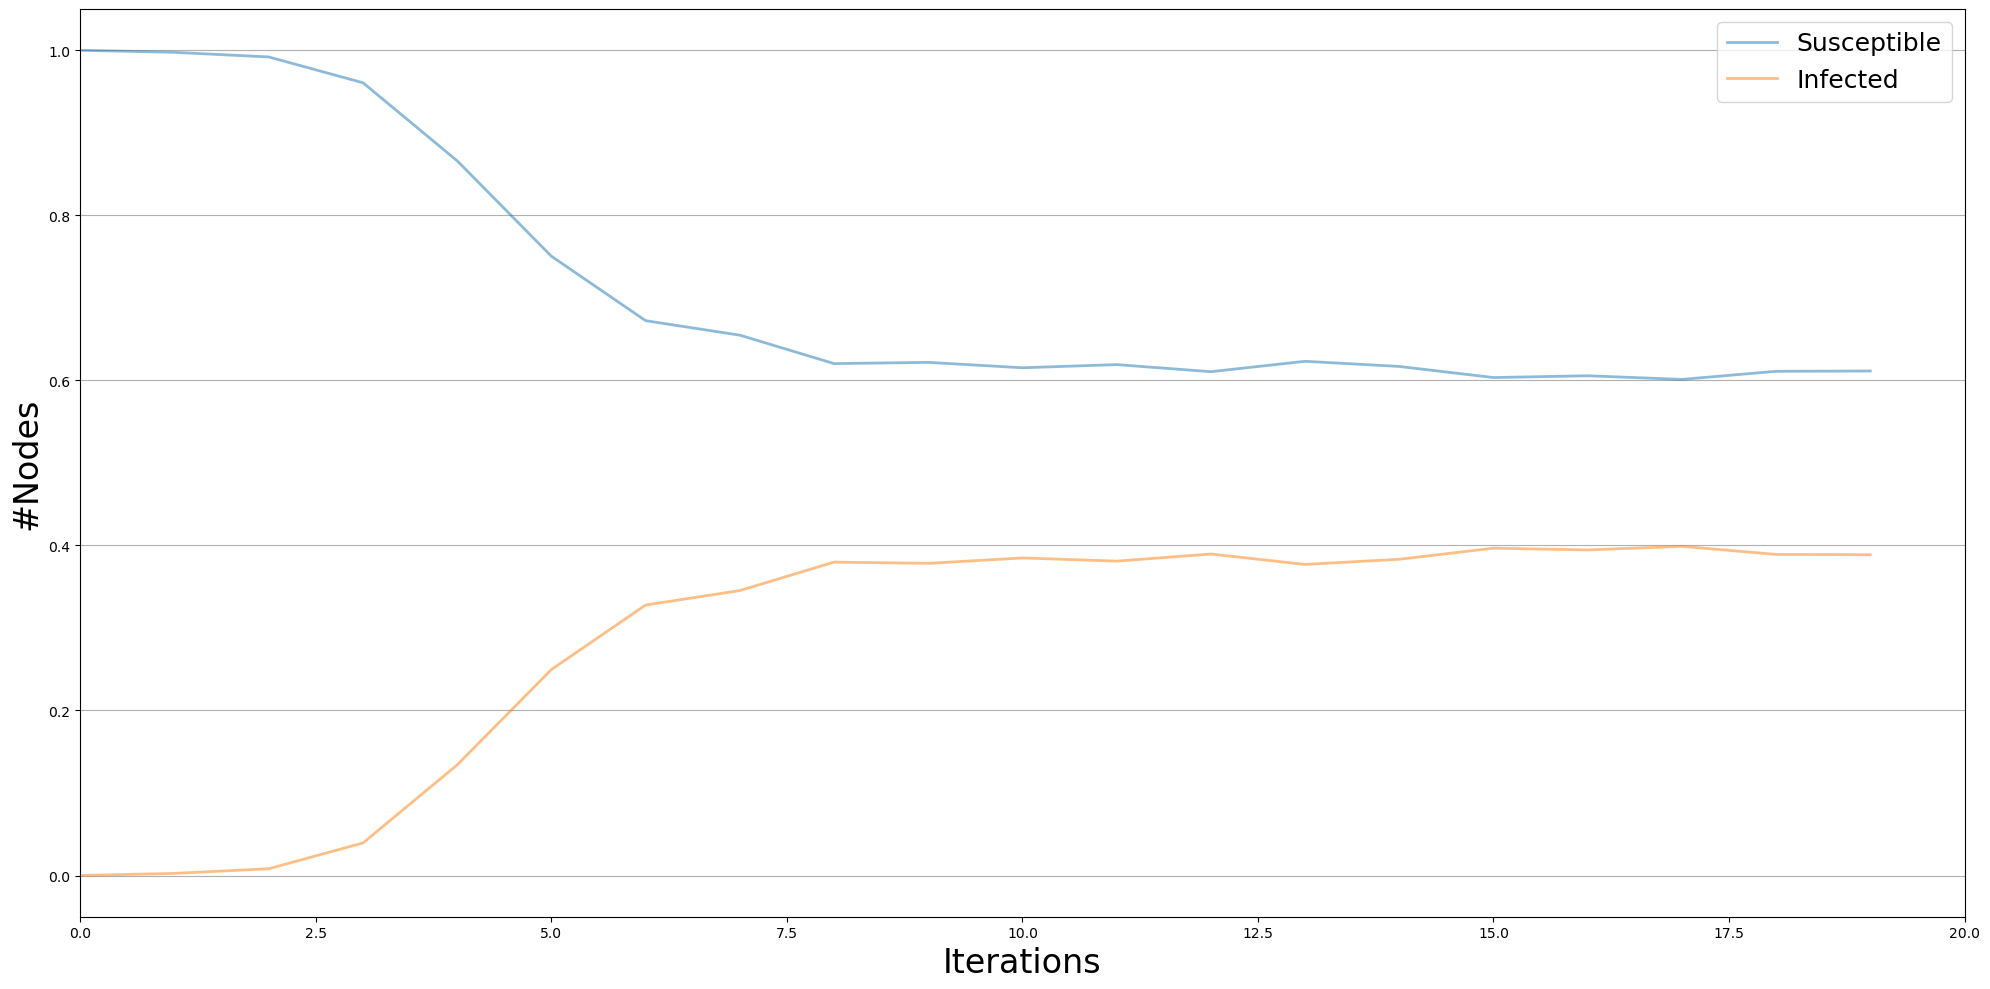

In [78]:
viz = DiffusionTrend(model_s4_2_1, trends_s4_2_1)
viz.plot()

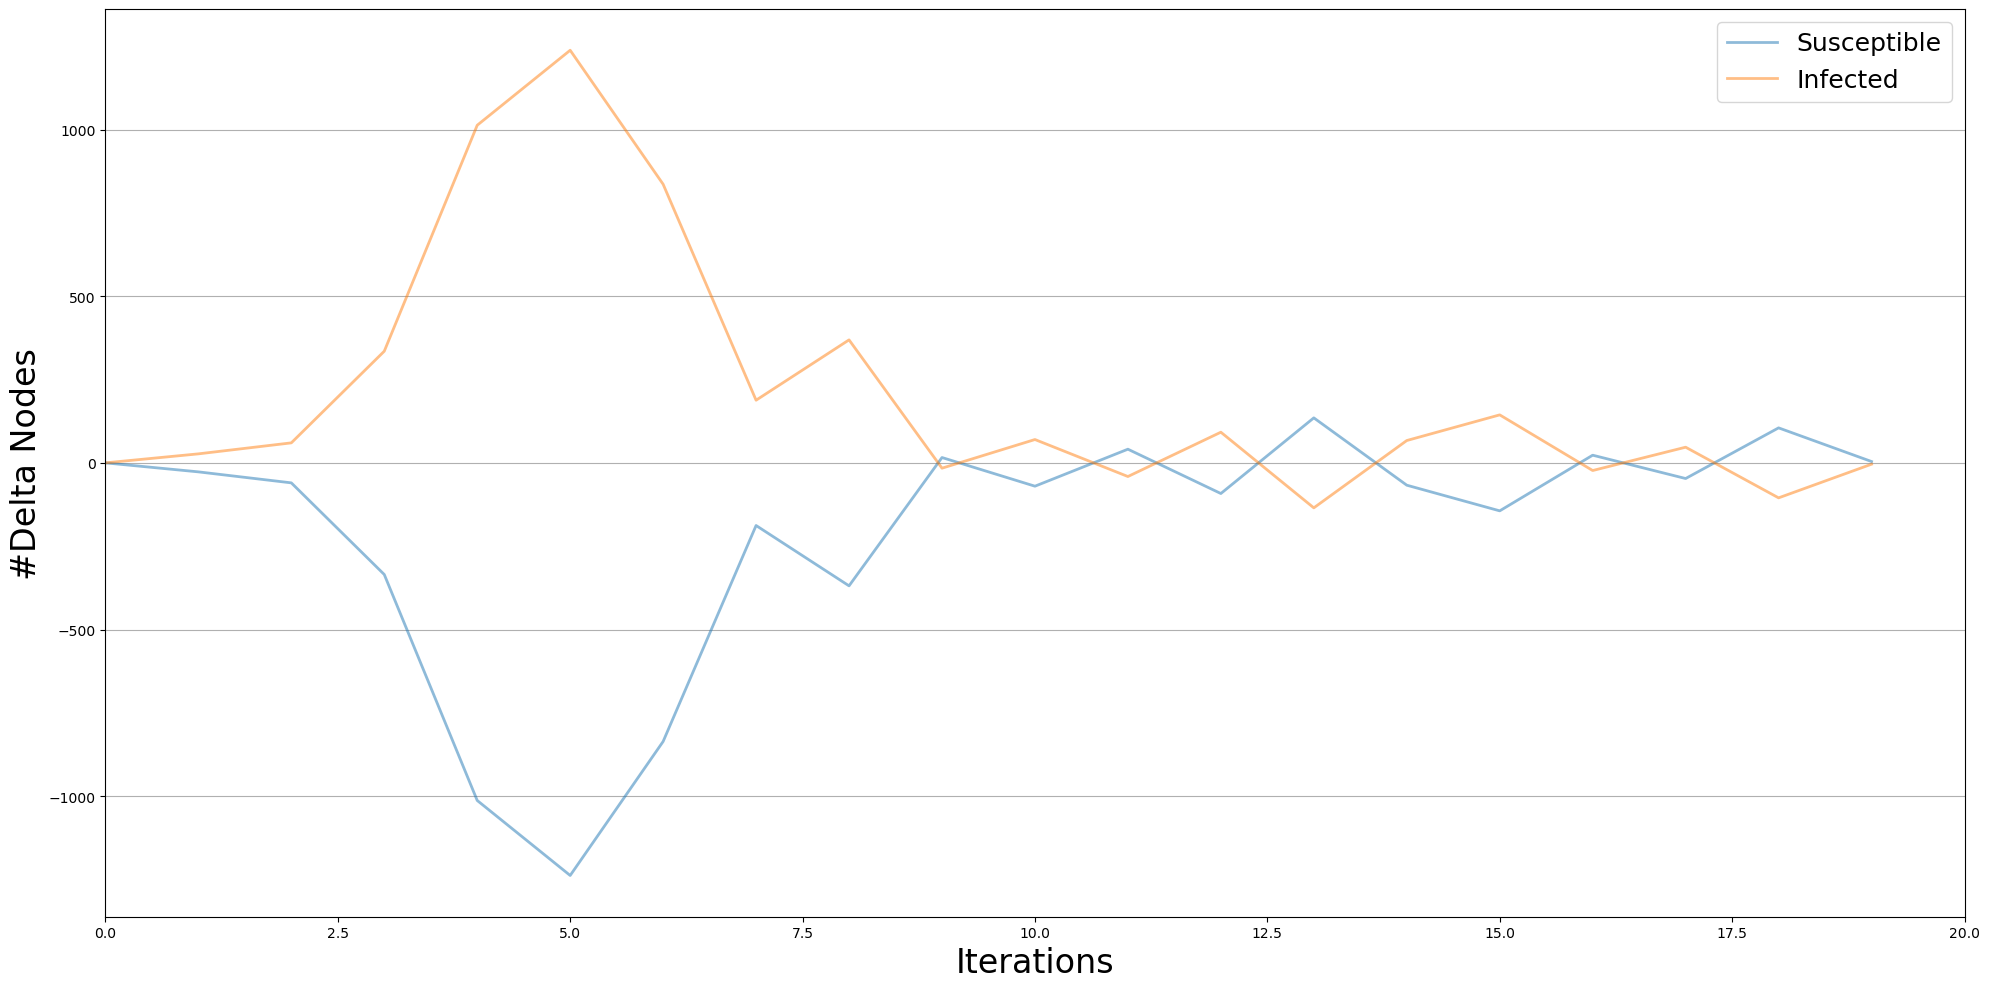

In [79]:
viz = DiffusionPrevalence(model_s4_2_1, trends_s4_2_1)
viz.plot()

### 2nd phase

In [80]:
model_s4_2_2 = ep.SISModel(g4)
cfg = mc.Configuration()
cfg.add_model_parameter('beta', b2) # infection rate
cfg.add_model_parameter('lambda', u2) # recovery rate
cfg.add_model_parameter("percentage_infected", 0.01)
model_s4_2_2.set_initial_status(cfg)
iterations = model_s4_2_2.iteration_bunch(25, node_status=True)
trends_s4_2_2 = model_s4_2_2.build_trends(iterations)

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:01<00:00, 13.33it/s]


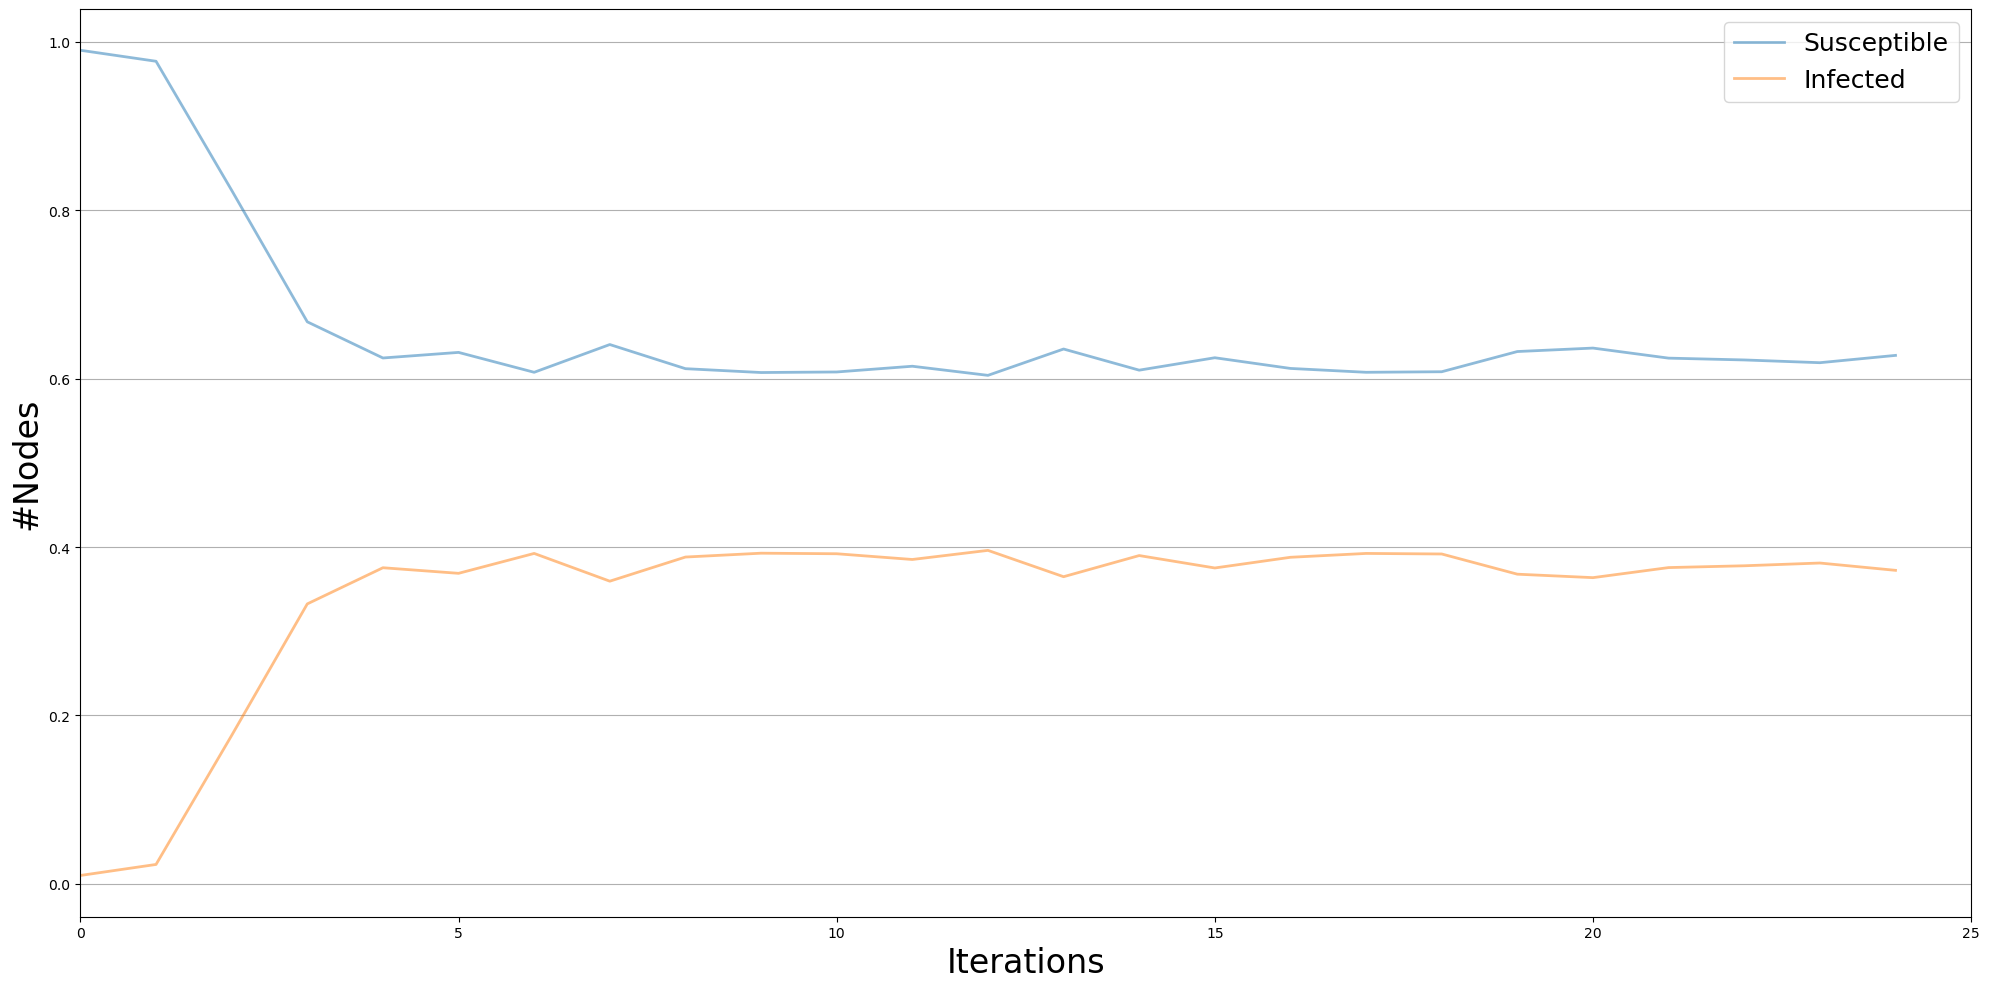

In [81]:
viz = DiffusionTrend(model_s4_2_2, trends_s4_2_2)
viz.plot()

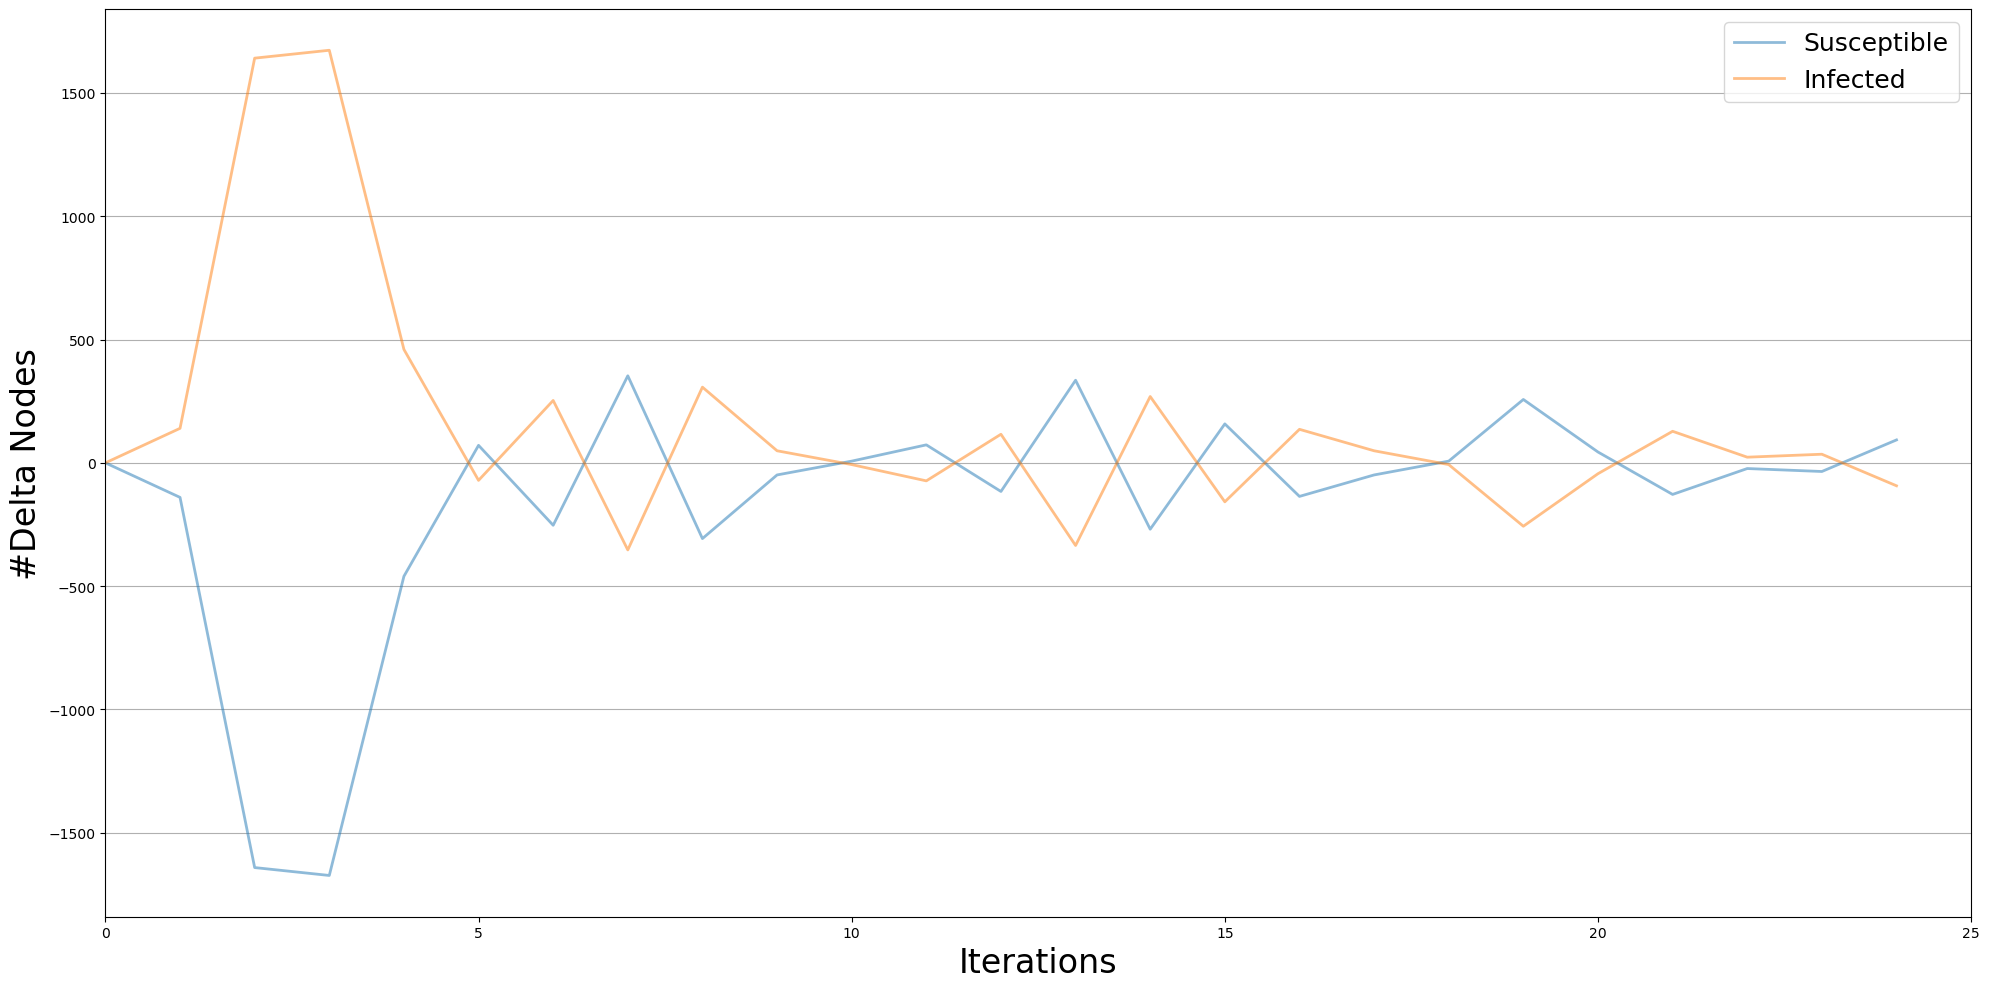

In [82]:
viz = DiffusionPrevalence(model_s4_2_2, trends_s4_2_2)
viz.plot()

### 3rd phase (with 40% already infected)

In [83]:
model_s4_3_40 = ep.SISModel(g4)
cfg = mc.Configuration()
cfg.add_model_parameter('beta', b3) # infection rate
cfg.add_model_parameter('lambda', u3) # recovery rate
cfg.add_model_parameter("percentage_infected", 0.4)
model_s4_3_40.set_initial_status(cfg)
iterations = model_s4_3_40.iteration_bunch(50, node_status=True)
trends_s4_3_40 = model_s4_3_40.build_trends(iterations)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:05<00:00,  9.37it/s]


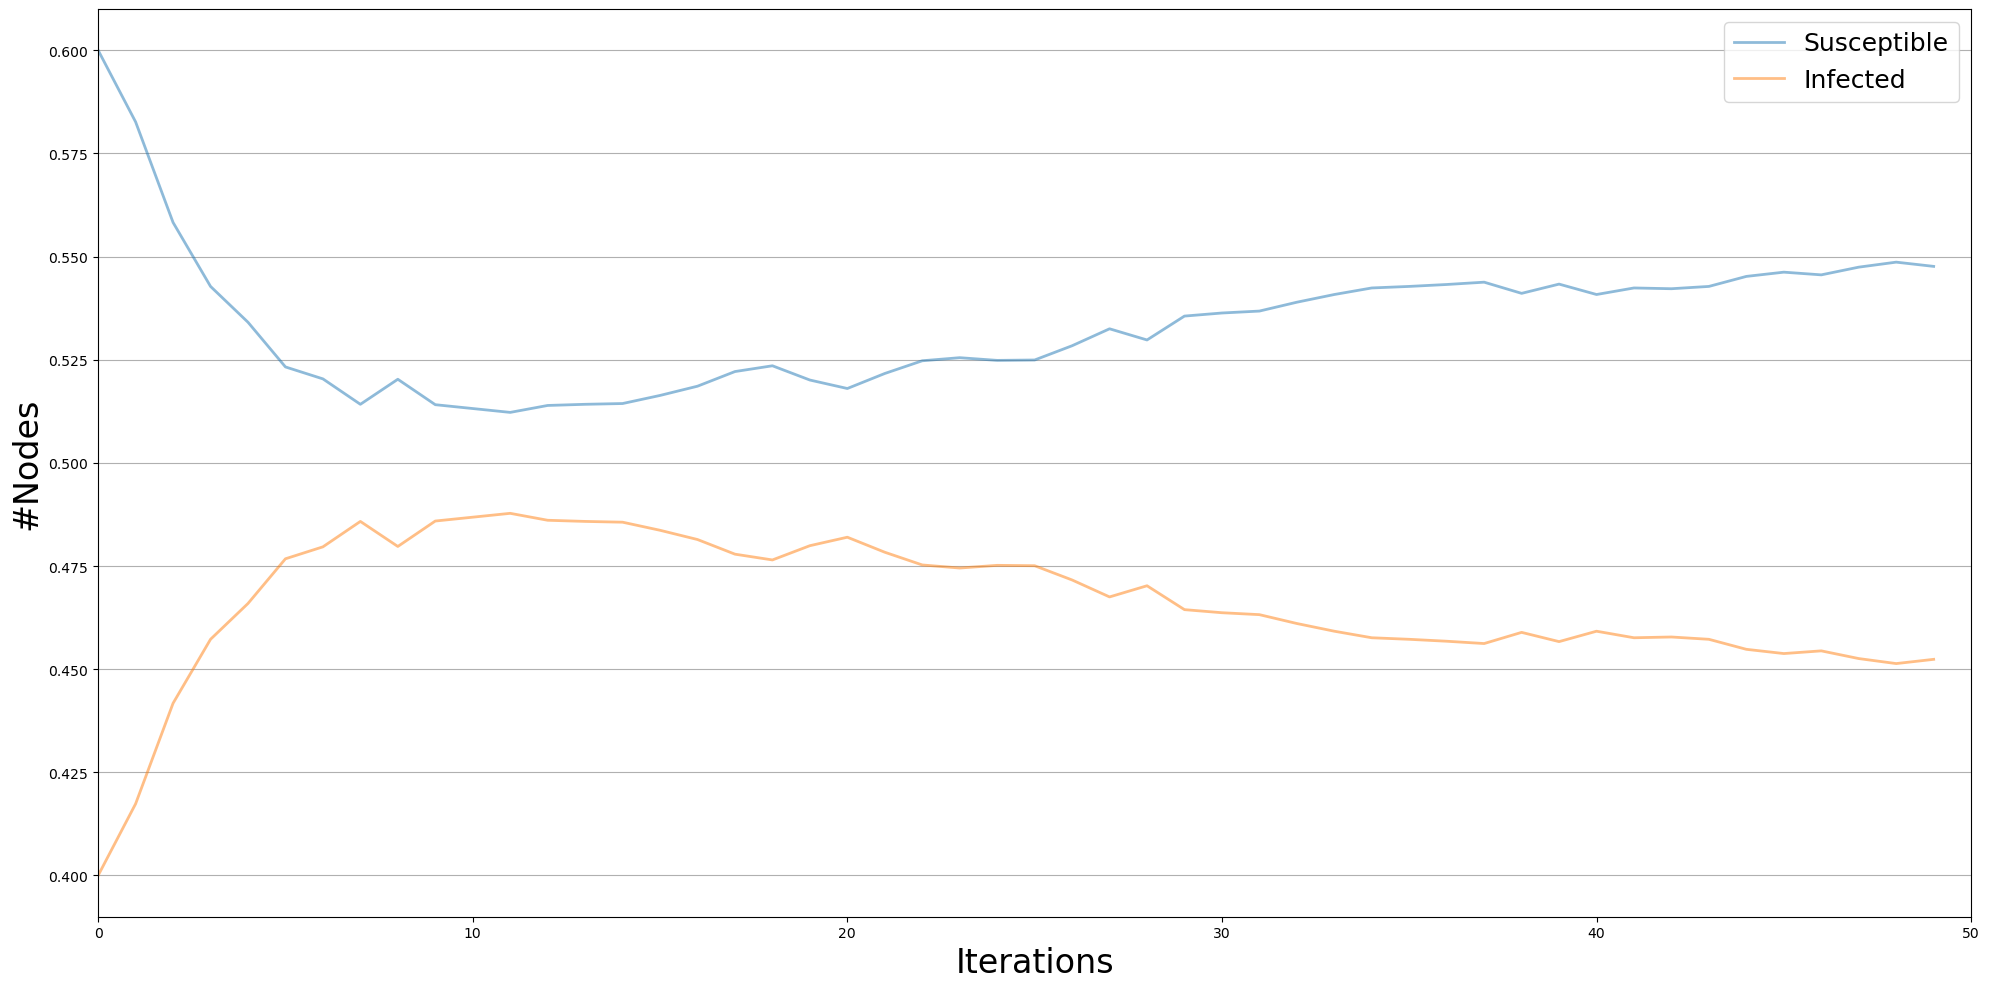

In [84]:
viz = DiffusionTrend(model_s4_3_40, trends_s4_3_40)
viz.plot()

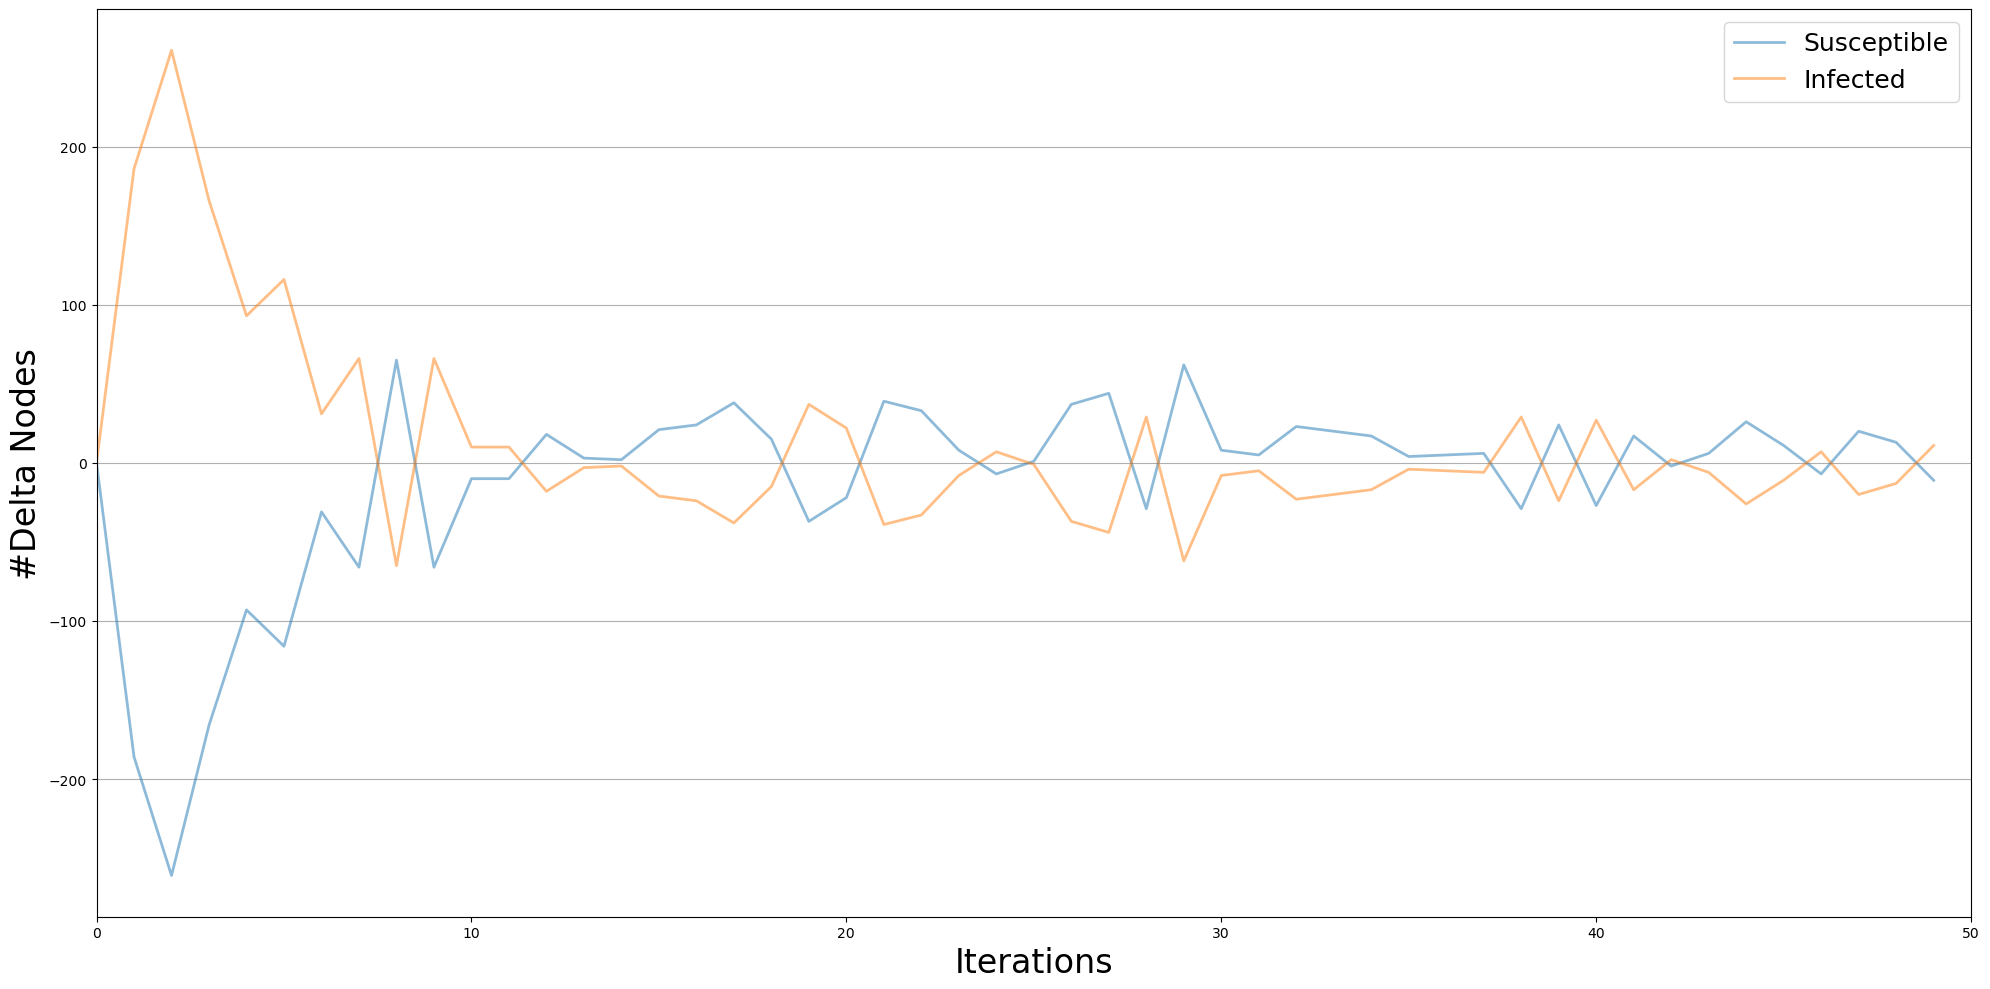

In [85]:
viz = DiffusionPrevalence(model_s4_3_40, trends_s4_3_40)
viz.plot()

The behaviour is very similar to the network with weights >2.

## Network with interactions >300

In [86]:
# directed graph of nodes with interactions >300

gc = nx.read_edgelist("D:/Dati PRAW/Project_Social_Network_Analysis-main/Project_Social_Network_Analysis-main/scraping data/data/soglia_int.csv", delimiter=",", nodetype=str, create_using=nx.DiGraph())

n_nodesc = gc.number_of_nodes()
n_edgesc = gc.number_of_edges()

print(n_nodesc, ",", n_edgesc)

4802 , 16745


### 1st phase

In [87]:
model_sc_2_1 = ep.SISModel(gc)

In [88]:
cfg = mc.Configuration()
cfg.add_model_parameter('beta', b1) # infection rate
cfg.add_model_parameter('lambda', u1) # recovery rate
infected_nodes = ['wallstreetbets']
cfg.add_model_initial_configuration("Infected", infected_nodes)
model_sc_2_1.set_initial_status(cfg)
iterations = model_sc_2_1.iteration_bunch(20, node_status=True)
trends_sc_2_1 = model_sc_2_1.build_trends(iterations)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 30.82it/s]


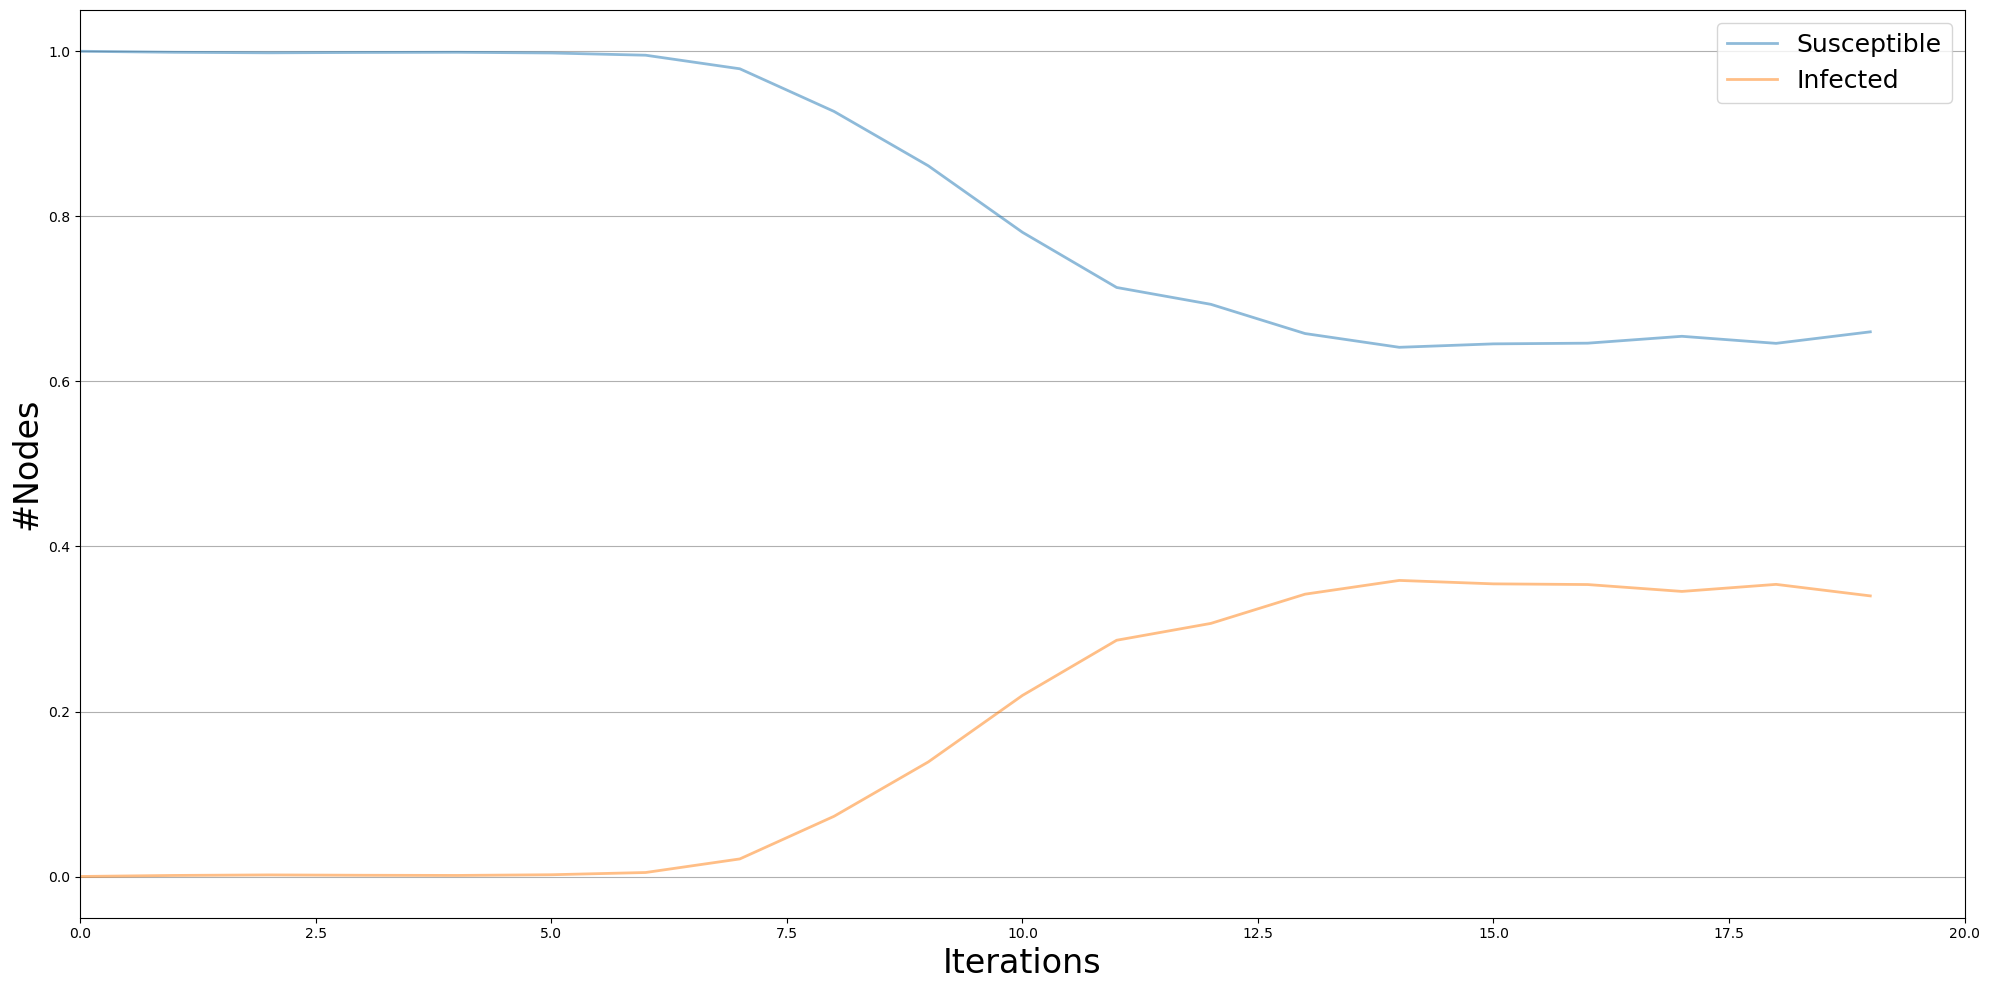

In [89]:
viz = DiffusionTrend(model_sc_2_1, trends_sc_2_1)
viz.plot()

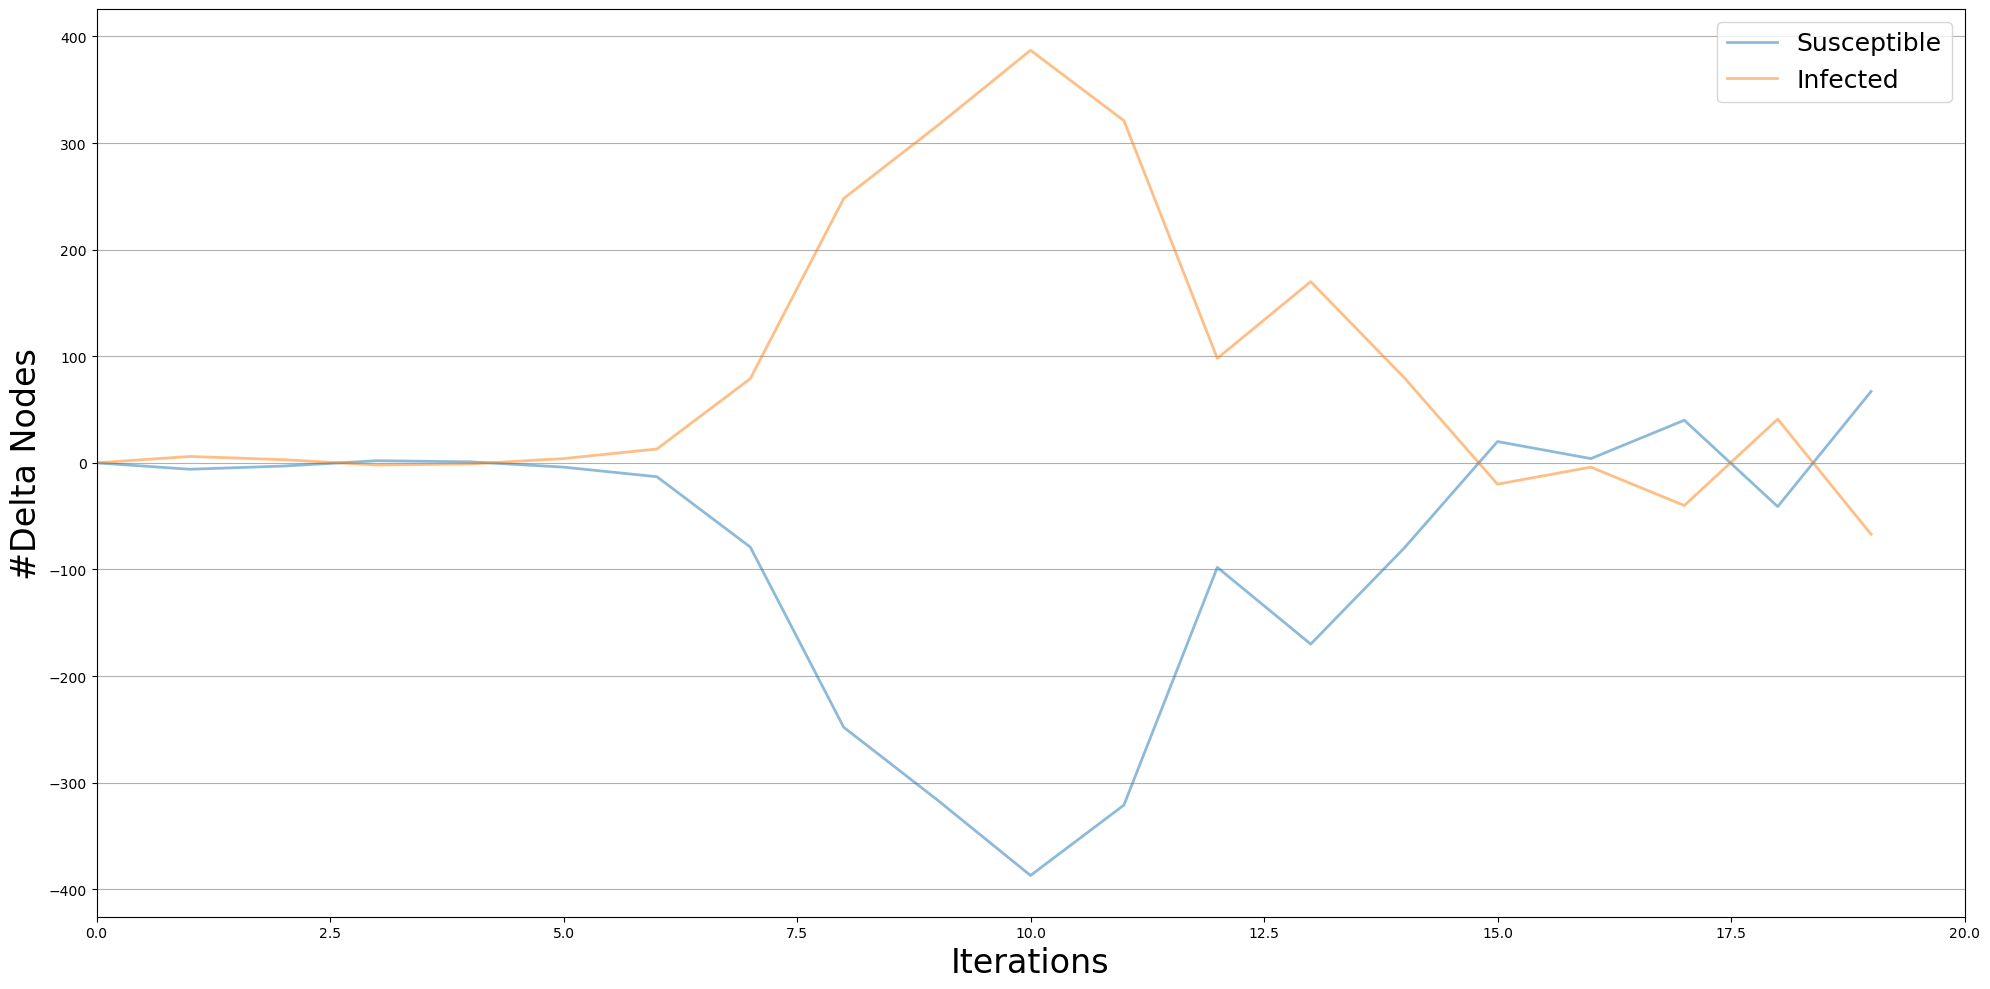

In [90]:
viz = DiffusionPrevalence(model_sc_2_1, trends_sc_2_1)
viz.plot()

### 2nd phase

In [91]:
model_sc_2_2 = ep.SISModel(gc)
cfg = mc.Configuration()
cfg.add_model_parameter('beta', b2) # infection rate
cfg.add_model_parameter('lambda', u2) # recovery rate
cfg.add_model_parameter("percentage_infected", 0.01)
model_sc_2_2.set_initial_status(cfg)
iterations = model_sc_2_2.iteration_bunch(25, node_status=True)
trends_sc_2_2 = model_sc_2_2.build_trends(iterations)

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 32.71it/s]


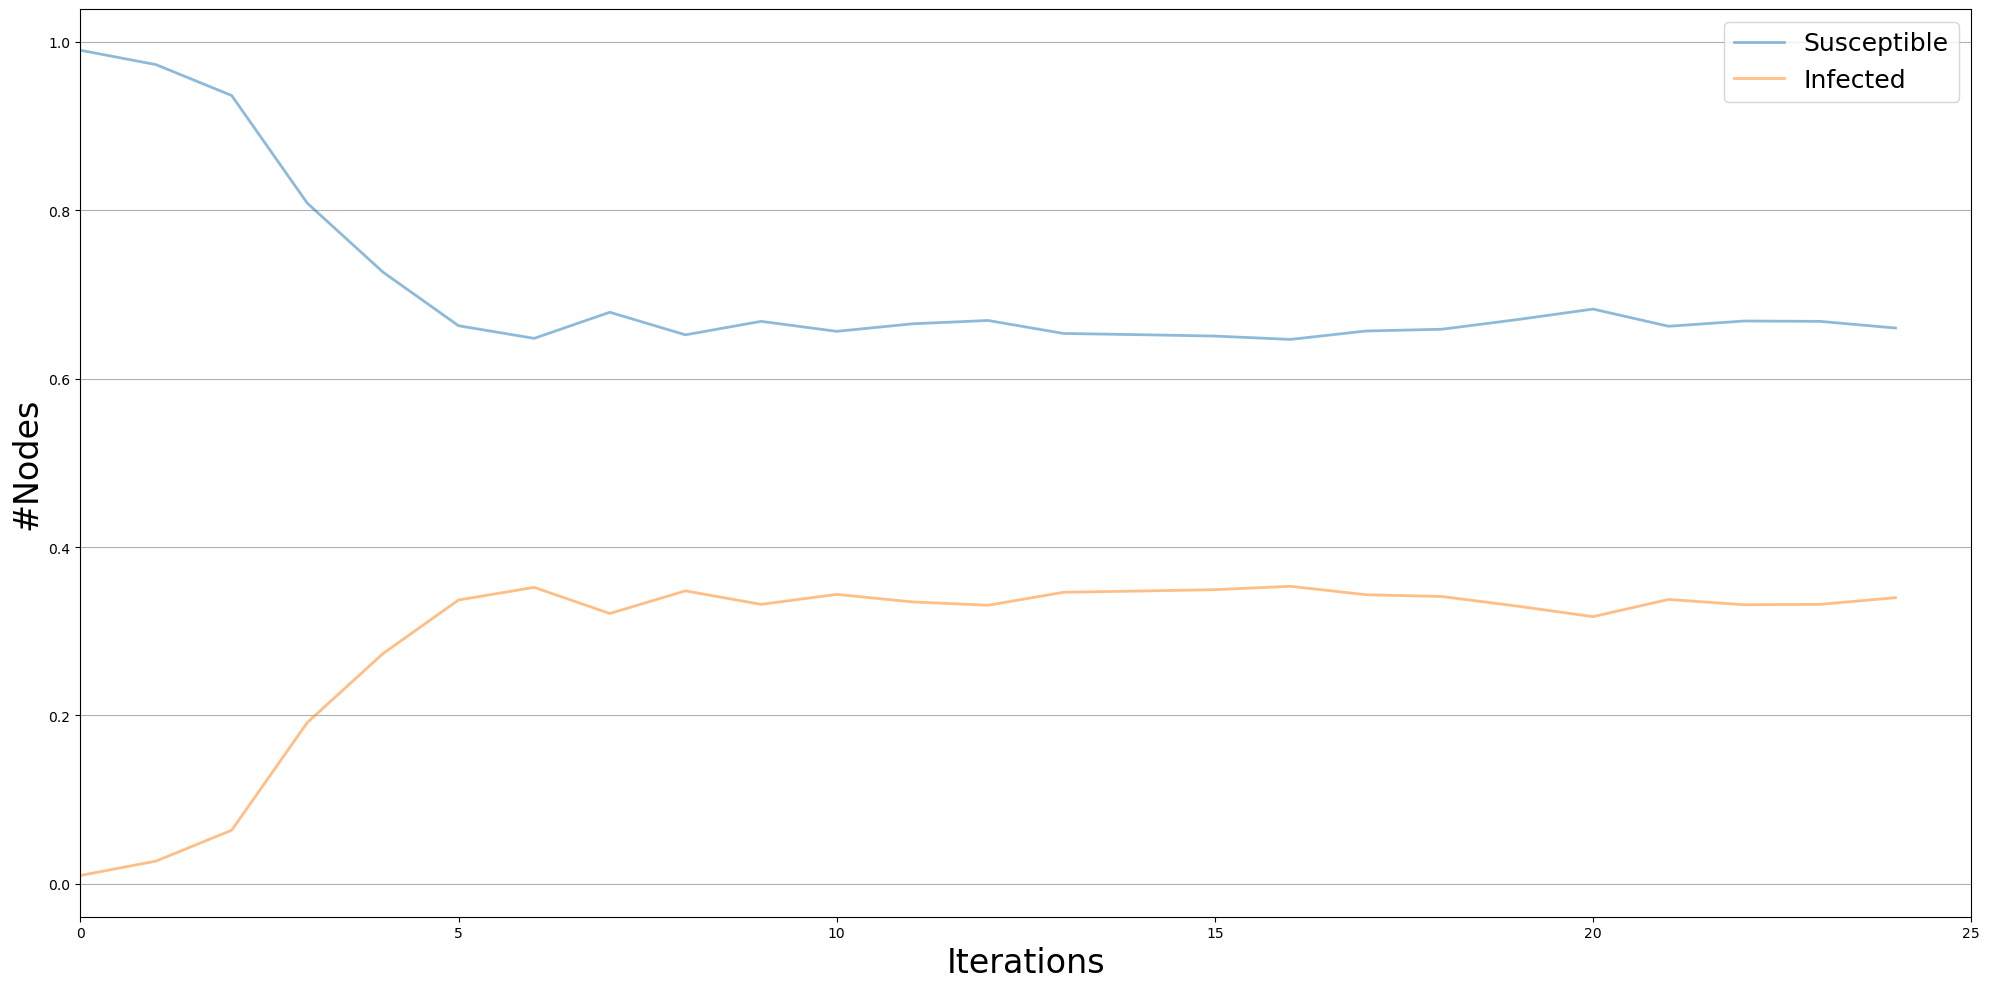

In [92]:
viz = DiffusionTrend(model_sc_2_2, trends_sc_2_2)
viz.plot()

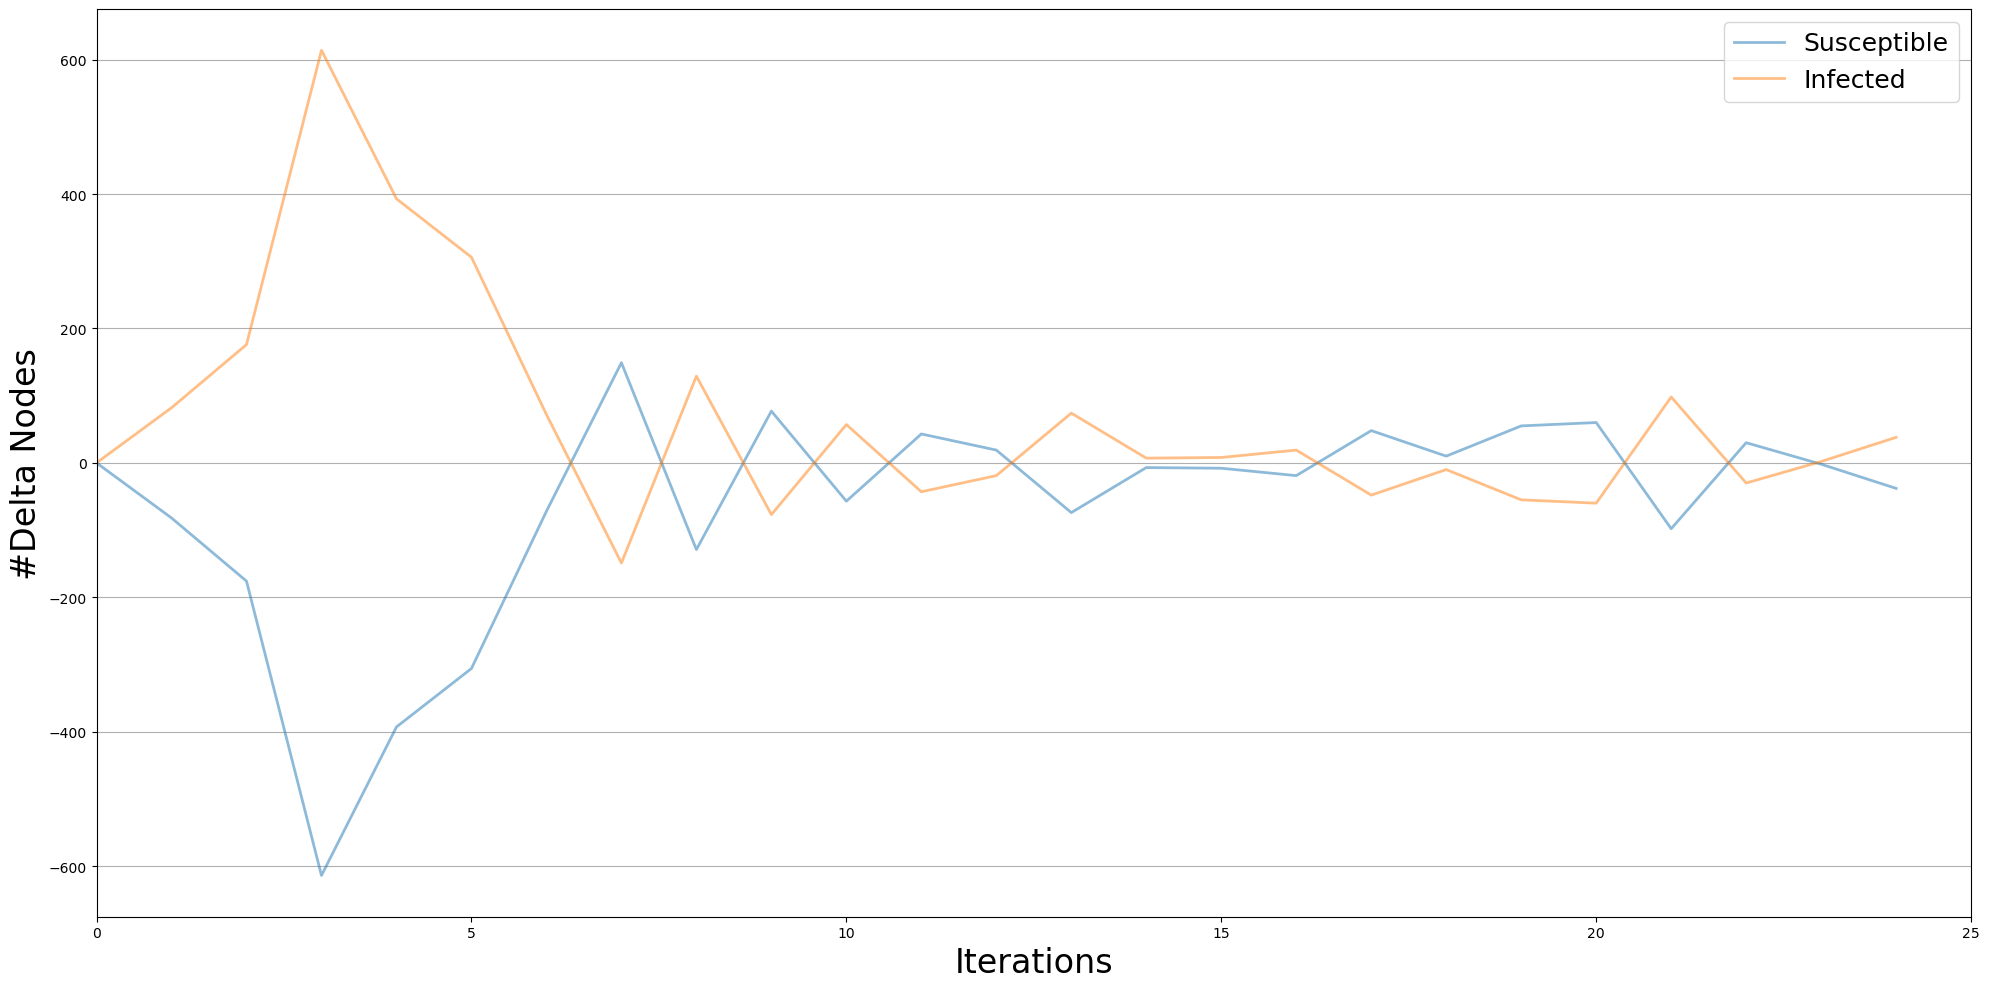

In [93]:
viz = DiffusionPrevalence(model_sc_2_2, trends_sc_2_2)
viz.plot()

### 3rd phase (with 40% already infected)

In [94]:
model_sc_3_40 = ep.SISModel(gc)
cfg = mc.Configuration()
cfg.add_model_parameter('beta', b3) # infection rate
cfg.add_model_parameter('lambda', u3) # recovery rate
cfg.add_model_parameter("percentage_infected", 0.4)
model_sc_3_40.set_initial_status(cfg)
iterations = model_sc_3_40.iteration_bunch(50, node_status=True)
trends_sc_3_40 = model_sc_3_40.build_trends(iterations)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 34.30it/s]


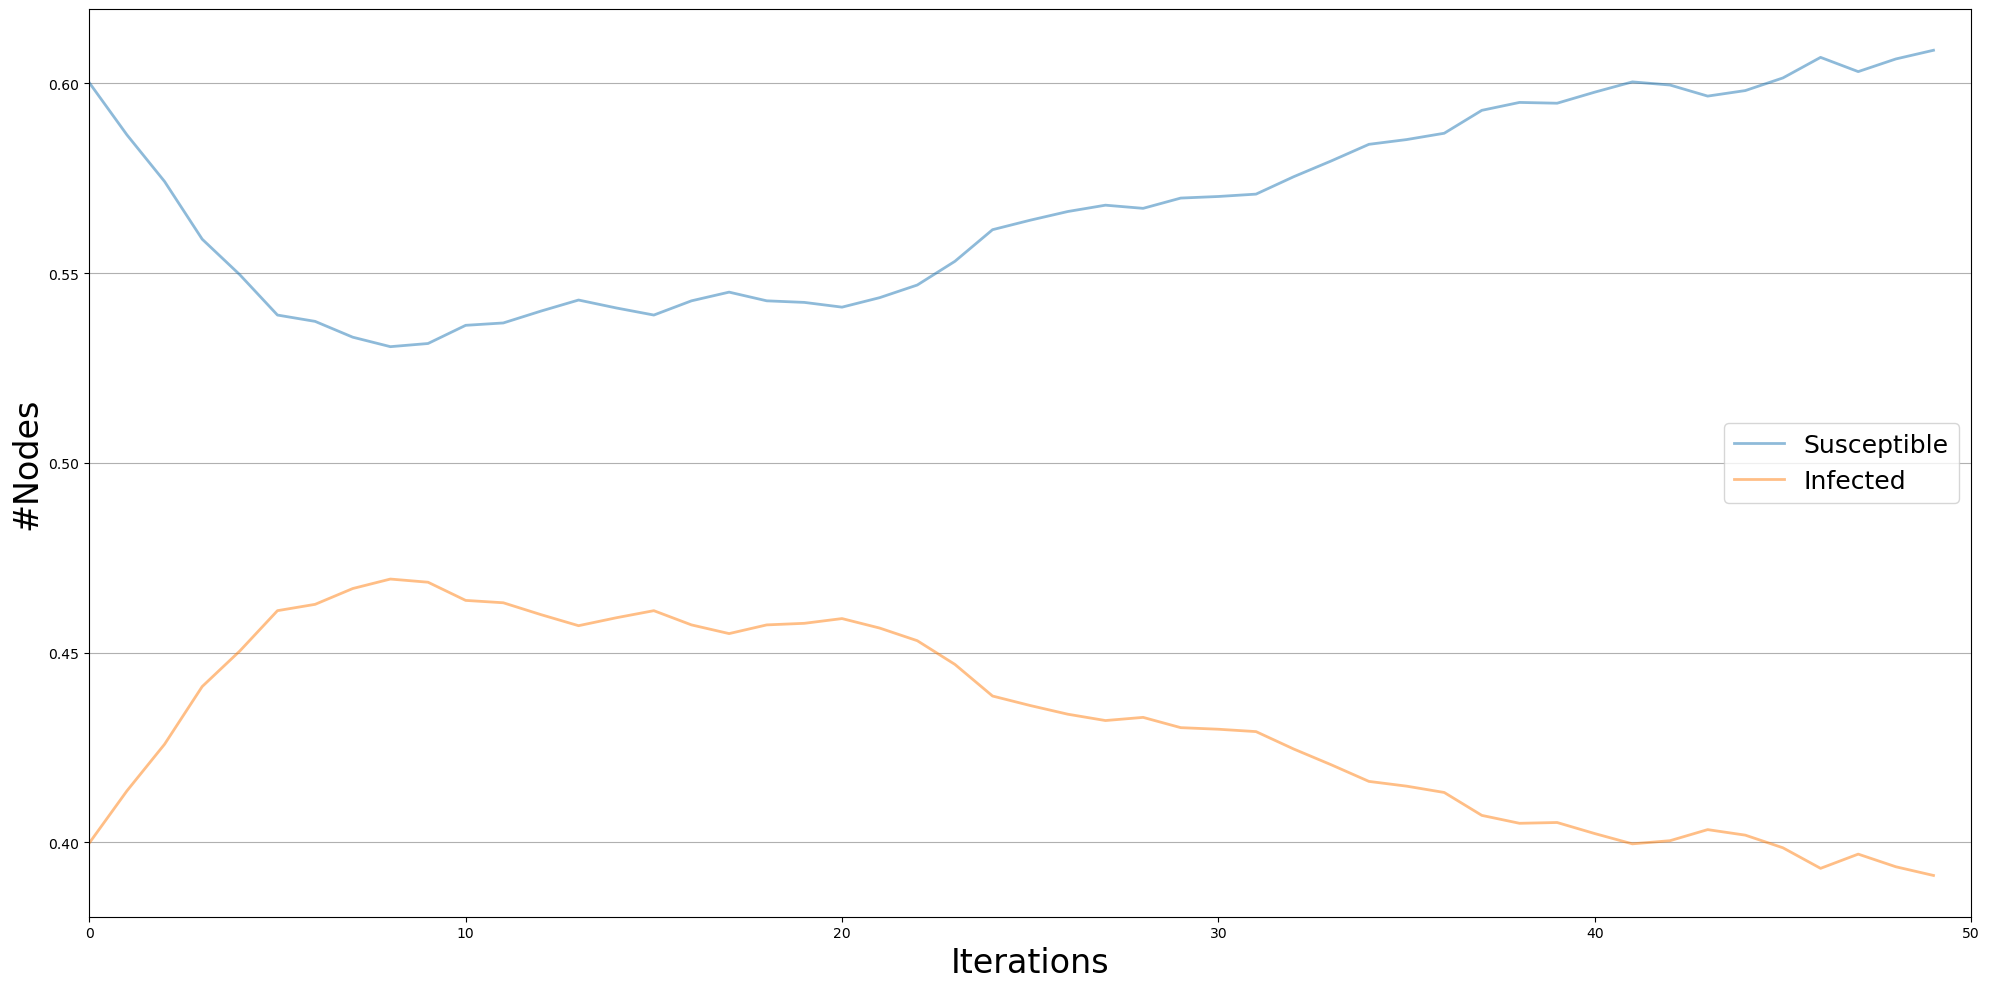

In [95]:
viz = DiffusionTrend(model_sc_3_40, trends_sc_3_40)
viz.plot()

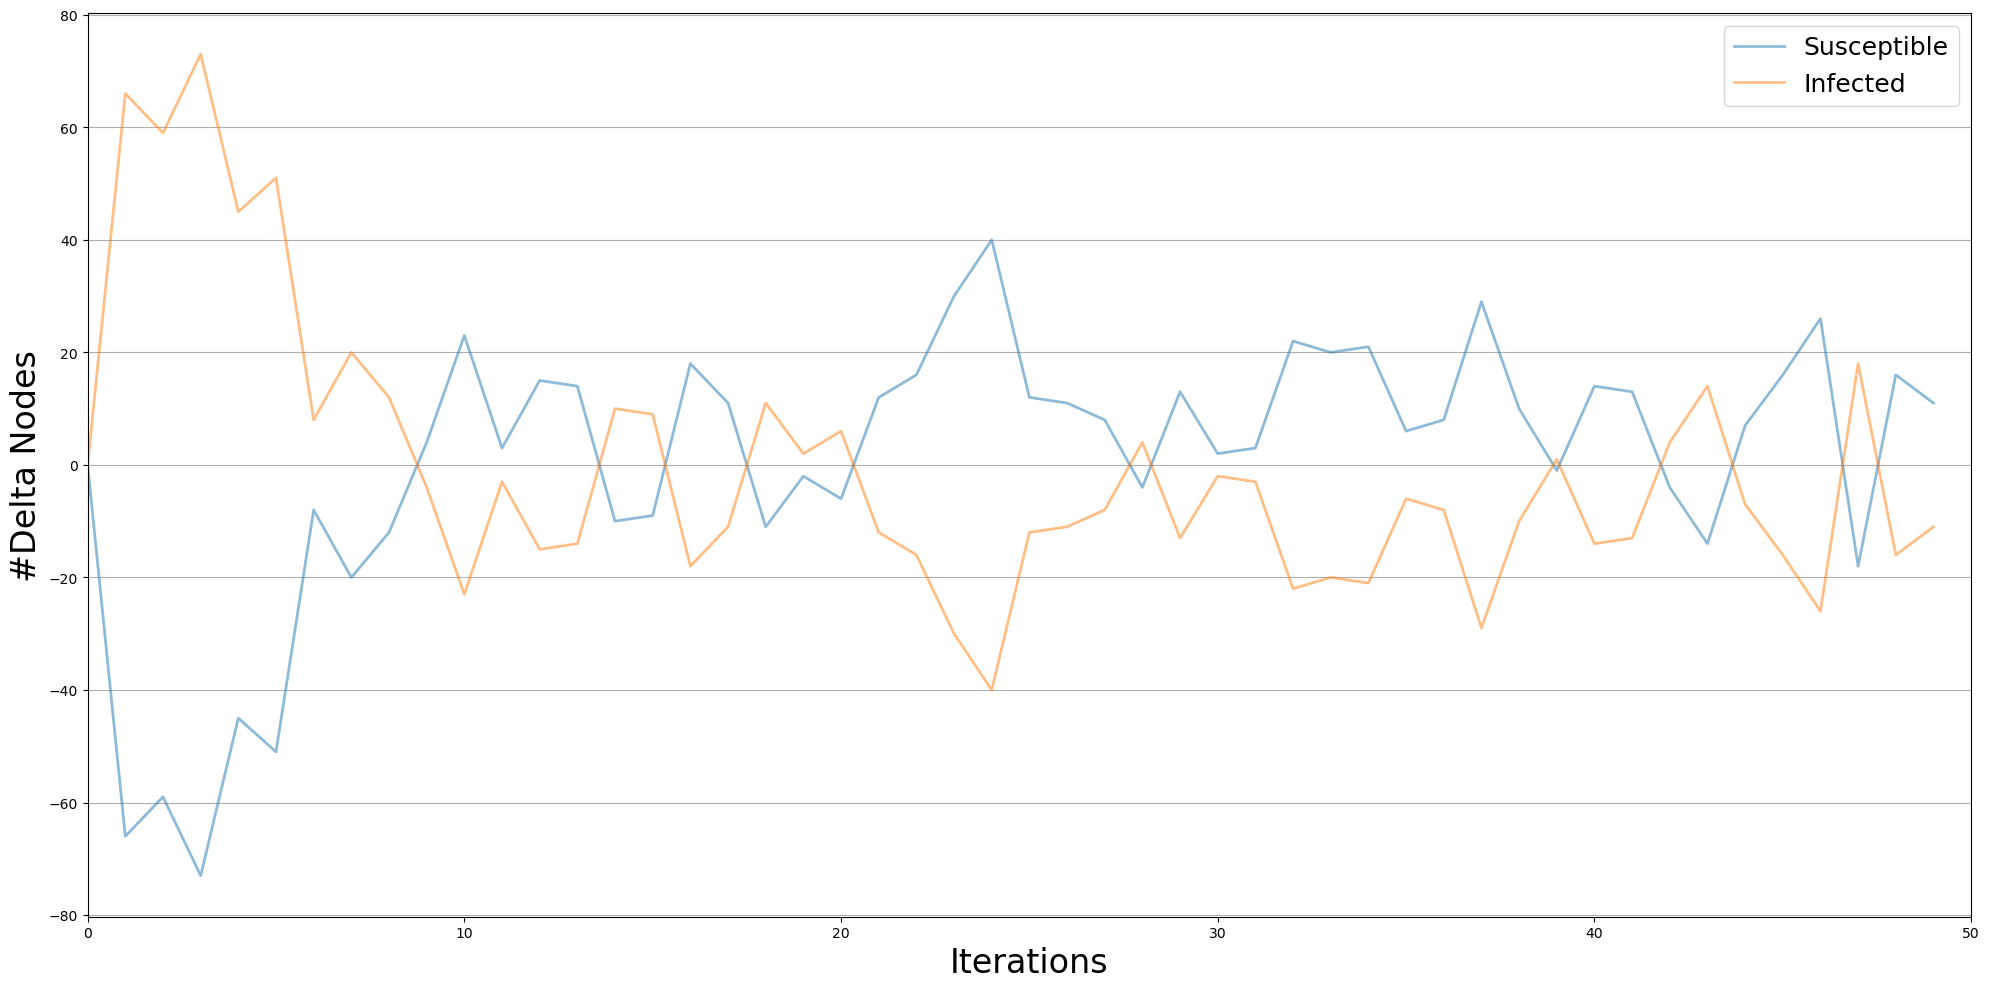

In [96]:
viz = DiffusionPrevalence(model_sc_3_40, trends_sc_3_40)
viz.plot()